In [2]:
n_sigma_cut = 0.5 # main force for the PID

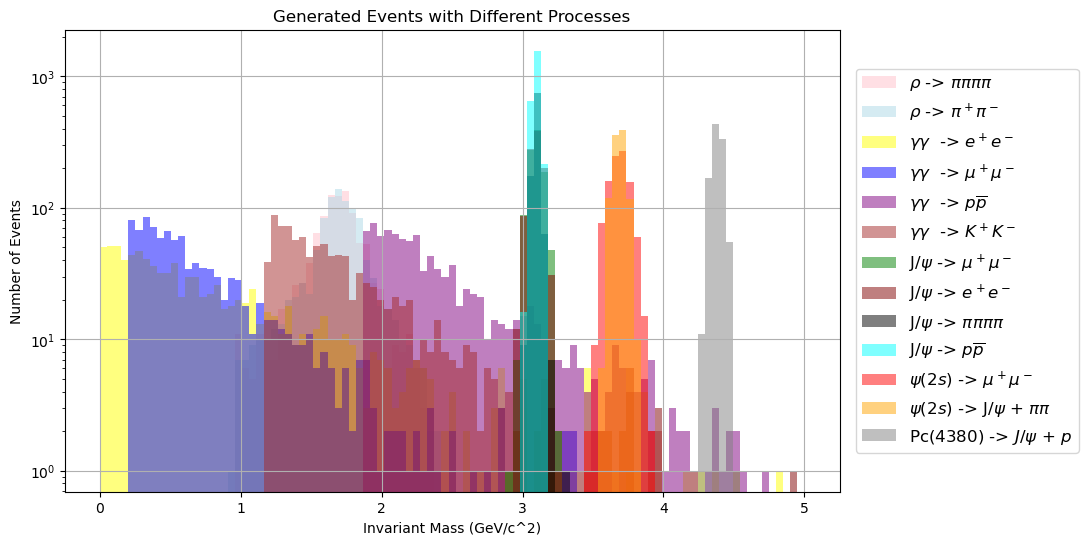

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 2144429
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500
n_photon_photon_proton = 10840 
n_photon_photon_electron = 2971120
n_jpsi_electrons = 84640 #Run 3 & 4
# n_rhoprime = 2886800
# n_rho_4pi = 

n_rhoprime = 2886800
n_rho_4pi = 31950960

n_training= 30000

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
m_kaon= 0.49367
m_rho = 0.775
m_rho_prime = 1.465
m_rho_1700 = 1.7 

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#NEW Rho Prime-------------------

def breit_wigner(m0, gamma, size=1):
    return m0 + 0.5 * gamma * np.tan(np.pi * (np.random.rand(size) - 0.5))

def relativistic_breit_wigner(m0, gamma, size=1):
    """
    Sample using relativistic Breit-Wigner:
    P(m) ∝ 1 / [(m^2 - m0^2)^2 + (m0 * gamma)^2]
    """
    m = np.zeros(size)
    for i in range(size):
        accepted = False
        while not accepted:
            # Sample uniformly in a window around the peak
            m_candidate = np.random.uniform(m0 - 3*gamma, m0 + 3*gamma)
            
            bw = 1.0 / ((m_candidate**2 - m0**2)**2 + (m0 * gamma)**2)
            bw_max = 1.0 / ((0)**2 + (m0 * gamma)**2)  # peak
            
            if np.random.rand() < bw / bw_max:
                m[i] = m_candidate
                accepted = True
    return m

def generate_rhoprime_events(n_events, m=1.7, gamma=0.250):
    events = []
    for _ in range(n_events):
        masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
        if masses_rho_prime < 2 * m_pion:
            continue
        pion1_p, pion2_p, E1, E2 = isotropic_two_body_decay(masses_rho_prime, m_pion, m_pion)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        events.append([pion1_p, pion2_p])
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

#NEW jpsi->ee
def generate_jpsi_electrons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_electron, m_electron)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> proton + proton

def generate_photon_photon_proton_events(n_events):
    masses = np.random.exponential(0.595, n_events) + 2 * m_proton  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(mass, m_proton, m_proton)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> electrons

def generate_photon_photon_electron_events(n_events):
    masses = np.random.exponential(0.925, n_events) + 2 * m_electron  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(mass, m_electron, m_electron)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_rho_4pions, events_rhoprime, events_photon_photon_electron, events_photon_photon, events_photon_photon_proton, events_pp_kaons, events_jpsi, events_jpsi_electrons, events_jpsi_4pions, events_jpsi_protons, events_psi2S_muons, events_psi2S_jpsi_pions, events_pq):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_rho_4pions, bins, alpha=0.5, label=r'$\rho$ -> $\pi \pi \pi \pi$', color='pink')
    plt.hist(events_rhoprime, bins, alpha=0.5, label=r'$\rho$ -> $\pi^+ \pi^-$', color='lightblue')
    plt.hist(events_photon_photon_electron, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $e^+ e^-$', color='yellow')
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $p \overline{p}$', color='purple')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_jpsi_electrons, bins, alpha=0.5, label=r'J/$\psi$ -> $e^+ e^-$', color='maroon')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')

    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.savefig('all_final_masses.pdf')
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.01, 0.5),   # 1.02 pushes it just outside the right edge
        fancybox=True,
        shadow=False,
        ncol=1,                       # vertical list (recommended for side placement)
        fontsize=12,
        markerscale=1.3
    )
    #plt.legend(loc='upper right', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_kaon(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_kaon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_electron(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_electron  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pion(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_pion  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_kaon(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_kaon(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pion(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pion(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_electron(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_electron(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_rho_four_pions(n_events, m=1.7, gamma=0.250):
    events = []
    for _ in range(n_events):
        masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
        if masses_rho_prime < 2 * m_pion:
            continue
        smearedTracks = []
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_rho_1700, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        # smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
        #                       E3_smeared, E4_smeared, pion1_E, pion2_E])
        # events.append(smearedTracks)
        # events.append([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p, E3_smeared, E4_smeared, pion1_E, pion2_E])
        # return np.array(events)


        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


    # def generate_rhoprime_events(n_events, m=1.7, gamma=0.250):
    # events = []
    # for _ in range(n_events):
    #     masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
    #     if masses_rho_prime < 2 * m_pion:
    #         continue
    #     pion1_p, pion2_p, E1, E2 = isotropic_two_body_decay(masses_rho_prime, m_pion, m_pion)
    #     # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
    #     # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
    #     events.append([pion1_p, pion2_p])
    #     # events.append(mass)
    # return np.array(events)

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: J/ψ -> ρ + π (two-body decay)
#         # The first daughter is the ρ, the second is the "direct" pion.
#         rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
#         pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
#         # (Beta = p/E for the ρ.)
#         beta = rho_p / rho_E
        
#         # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
#         E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
#         E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
#         # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
#         p1_lab_mag = np.linalg.norm(pion1_p_lab)
#         p2_lab_mag = np.linalg.norm(pion2_p_lab)
#         smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
#         smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
#         # Extract the original directions from the boosted momenta.
#         theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
#         phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
#         theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
#         phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
#         # Reconstruct the smeared momentum vectors.
#         smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
#         smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
#         # Recalculate the energies for these pions.
#         E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
#         E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
#         # Step 5: Process the direct pion.
#         # Optionally, you can smear its momentum as well.
#         p_direct = np.linalg.norm(pion_direct_p)
#         smeared_direct = tpc_momentum_resolution(p_direct)
#         theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
#         phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
#         smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
#         E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
#         # Final event: three pions with their four-vector information.
#         # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
#         # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
#         # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
#         smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
#         events.append(smearedTracks)

#         # events.append(event)
    
#     return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses


# Steering function for generating events
def generate_all_events():
    events_photon_photon_electron = generate_photon_photon_electron_events(1000)
    events_photon_photon = generate_photon_photon_events(1000)
    events_jpsi = generate_jpsi_events(1000)
    events_psi2S_muons = generate_psi2S_muons_events(1000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(1000)
    events_pp_kaons = generate_pp_kaon_events(1000)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(1000)
    events_jpsi_4pions = generate_jpsi_four_pions(1000)
    events_photon_photon_proton = generate_photon_photon_proton_events(1000)
    events_jpsi_electrons = generate_jpsi_electrons_events(1000)
    events_rho_4pions = generate_rhoprime_events(1000)
    events_rhoprime = generate_rhoprime_events(1000)

    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon_electron = compute_invariant_masses_for_events_electron(events_photon_photon_electron)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    photon_photon_kaons     = compute_invariant_masses_for_events_kaon(events_pp_kaons)

    rho_4pi  = compute_invariant_masses_for_events_pion(events_rho_4pions)
    rho_prime  = compute_invariant_masses_for_events_pion(events_rhoprime)

    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    jpsi_electrons  = compute_invariant_masses_for_events_electron(events_jpsi_electrons)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
 
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)

    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)

    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(rho_4pi, rho_prime, photon_photon_electron, photon_photon, photon_photon_proton, photon_photon_kaons, jpsi, jpsi_electrons, jpsi_4pi, jpsi_protons, psi2s_muons, psi2s_jpsi_pi, pentaquark)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()

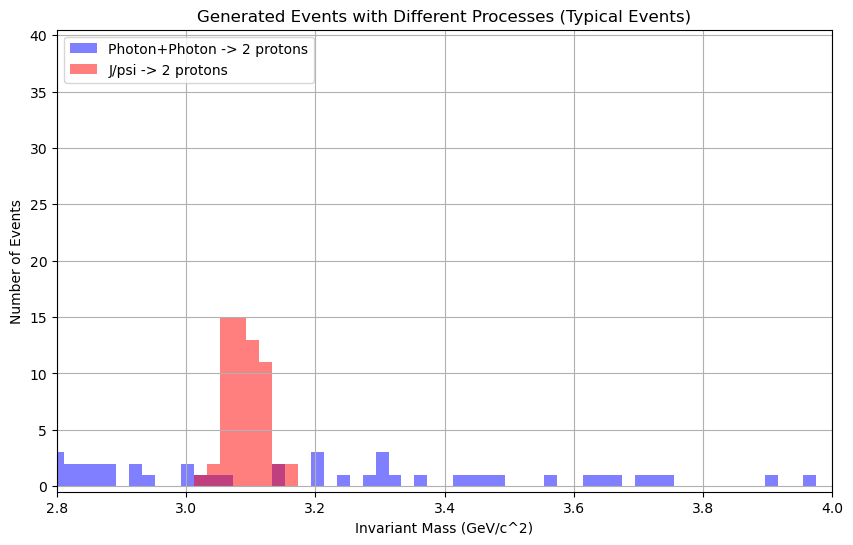

In [3]:
def plot_event_distribution_proton(events_photon_photon_proton, events_jpsi_protons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 250)
    plt.hist(events_photon_photon_proton, bins=bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='blue')
    plt.hist(events_jpsi_protons, bins=bins, alpha=0.5, label='J/psi -> 2 protons', color='red')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(2.8,4)
    plt.ylabel('Number of Events')
    plt.ylim(-0.5,40.5)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_proton():
    events_photon_photon_proton = generate_photon_photon_proton_events(271)
    events_jpsi_protons = generate_jpsi_protons_events(61)
    

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    
    plot_event_distribution_proton(photon_photon_proton, jpsi_protons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_proton()

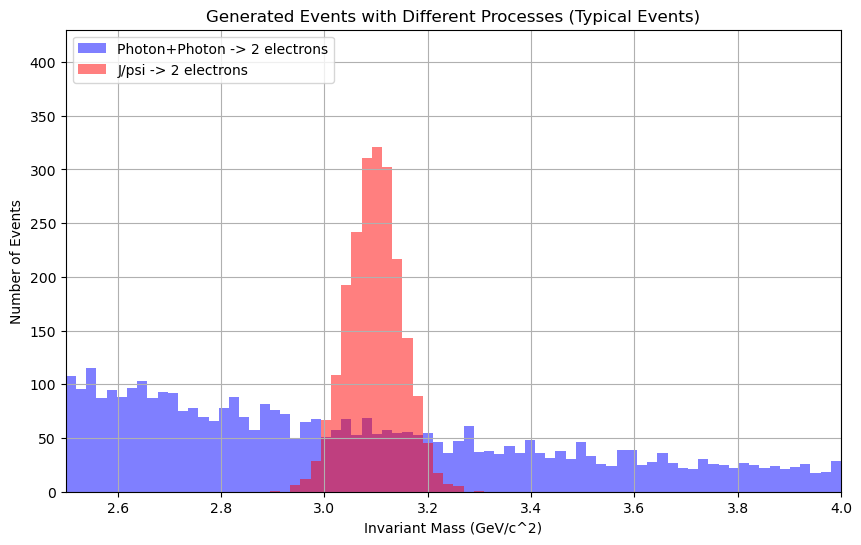

In [4]:
n_pp_electron_run2 = 74278
n_jpsi_electron_run2 = 2116


def plot_event_distribution_electron(events_photon_photon_electron, events_jpsi_electrons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(2.5, 4, 77)
    plt.hist(events_photon_photon_electron, bins=bins, alpha=0.5, label='Photon+Photon -> 2 electrons', color='blue')
    plt.hist(events_jpsi_electrons, bins=bins, alpha=0.5, label='J/psi -> 2 electrons', color='red')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(2.5,4)
    plt.ylabel('Number of Events')
    plt.ylim(0,430)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_electron():
    events_photon_photon_proton = generate_photon_photon_electron_events(n_pp_electron_run2)
    events_jpsi_electrons = generate_jpsi_electrons_events(n_jpsi_electron_run2)
    

    photon_photon_electron = compute_invariant_masses_for_events_electron(events_photon_photon_proton)
    jpsi_electrons  = compute_invariant_masses_for_events_electron(events_jpsi_electrons)
    
    plot_event_distribution_electron(photon_photon_electron, jpsi_electrons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_electron()

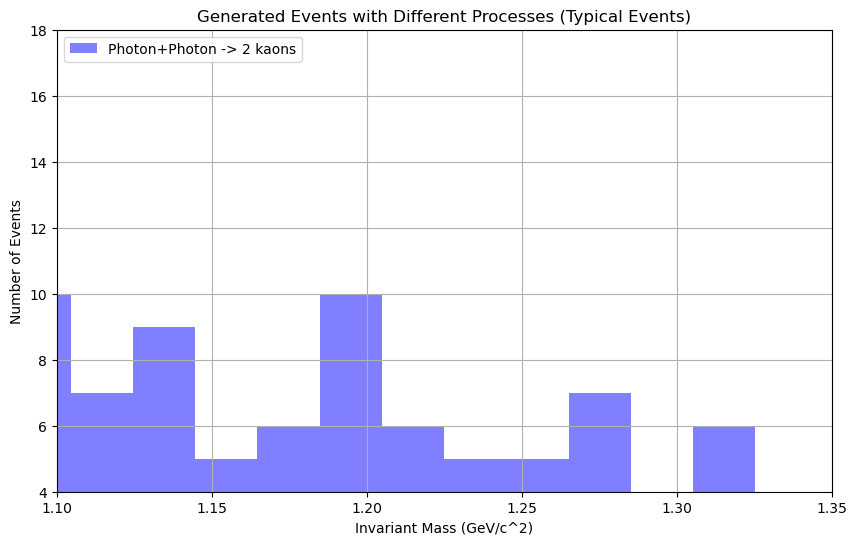

In [5]:
def plot_event_distribution_kaon(events_photon_photon_kaon):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 250)
    plt.hist(events_photon_photon_kaon, bins=bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='blue')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(1.1,1.35)
    plt.ylabel('Number of Events')
    plt.ylim(4,18)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_kaon():
    events_photon_photon_kaon = generate_pp_kaon_events(423)
    
    photon_photon_kaon = compute_invariant_masses_for_events(events_photon_photon_kaon)
    
    plot_event_distribution_kaon(photon_photon_kaon)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_kaon()

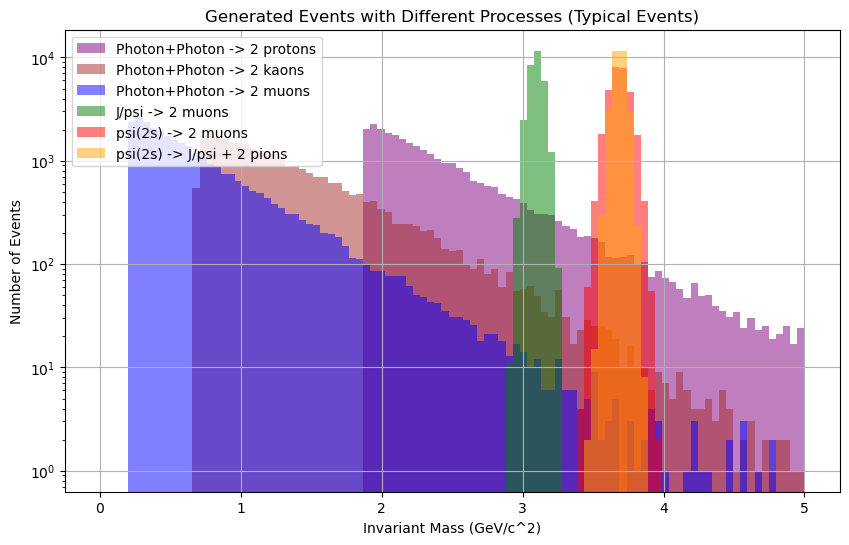

In [6]:

def plot_event_distribution_training(events_photon_photon_proton, events_pp_kaons, events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='purple')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
    plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2s) -> 2 muons', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2s) -> J/psi + 2 pions', color='orange')
    
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

plt.rcParams.update({'font.size': 10})

def generate_all_events_training():
    events_photon_photon_proton = generate_photon_photon_proton_events(30000)
    events_pp_kaons = generate_pp_kaon_events(30000)
    events_photon_photon = generate_photon_photon_events(30000)
    events_jpsi = generate_jpsi_events(30000)
    events_psi2S_muons = generate_psi2S_muons_events(30000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(30000)

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)

    
    plot_event_distribution_training(photon_photon_proton, pp_kaons, photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_training()

[207.92076444885726, 253.00564736347079, 174.32102273161135, 225.34885250969836, 244.77746844819976, 238.9869866338316, 197.8389742542606, 205.61466943201708, 263.24689934104276, 187.38990445889215, 226.45427069026996, 190.84431852099846, 224.04182433138158, 244.92817918772133, 213.68324546468364, 199.2596510295364, 236.01314548452547, 223.35355240352547, 269.85149520925427, 187.79934405751698, 219.04783495609826, 276.4839451992373, 219.9041702471808, 229.62753720074454, 234.65365750887798, 228.37652650970054, 233.58491887194347, 205.01123931414924, 242.71607418158513, 247.00328931041543, 224.59590747873702, 222.51222622472073, 209.88212151156378, 230.30188764355995, 213.61301025838728, 212.76830801591402, 202.7128650272841, 212.38440265442713, 225.19721077115705, 207.82160115852864, 242.30496758451469, 202.18239389606052, 240.15380228610545, 226.75647699447876, 249.9652876287548, 218.13604573913142, 248.7534319717134, 166.45444250504508, 188.09549975495037, 197.32895762227682, 217.821

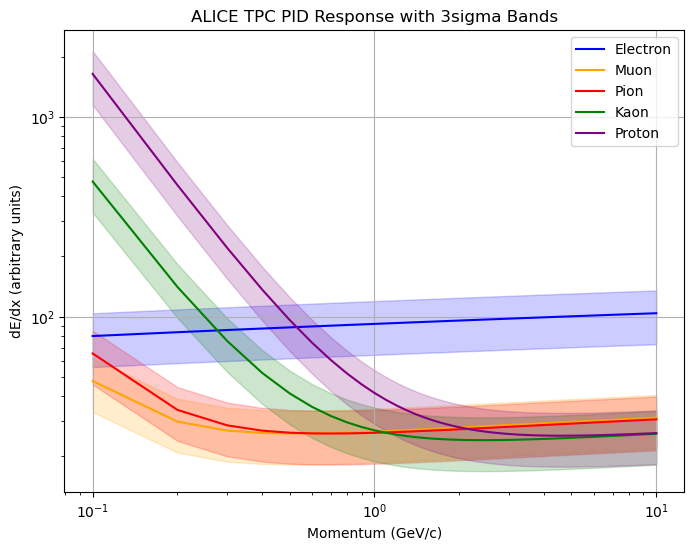

In [4]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


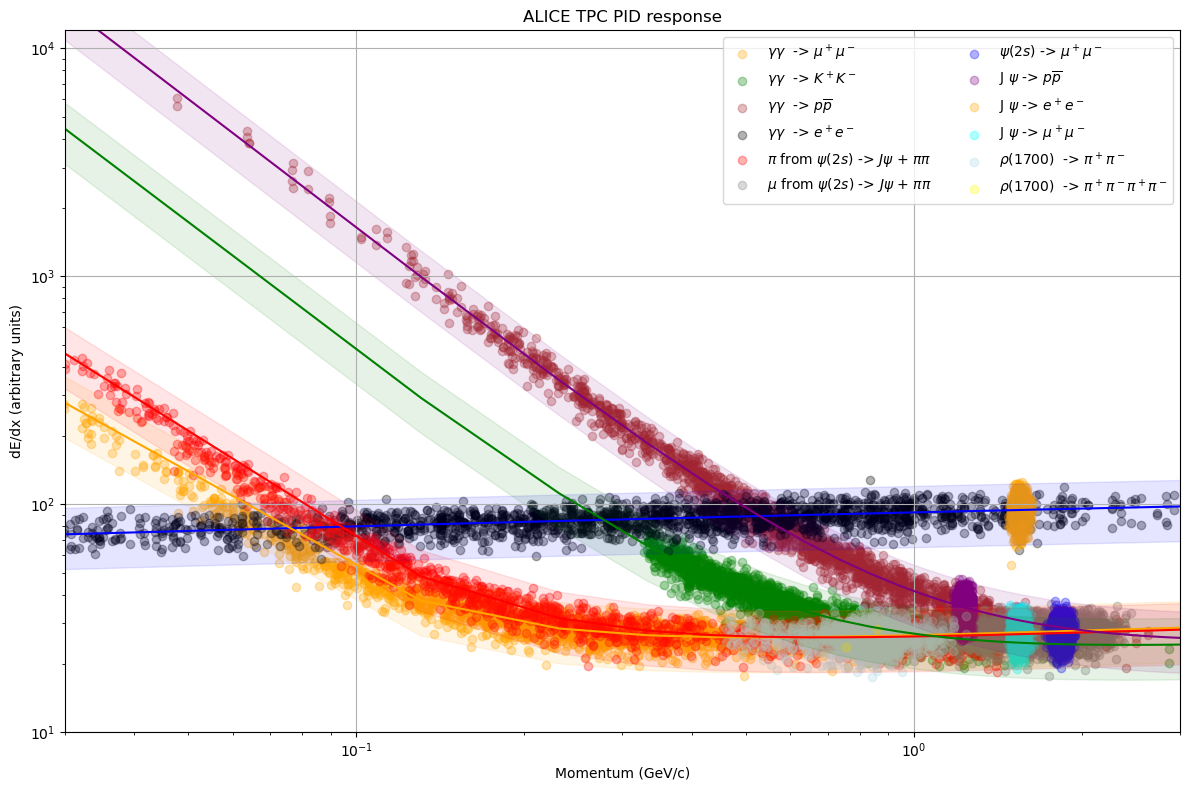

In [5]:
n_events = 1000

# plt.rcParams.update({'font.size': 15})

#Generate Jpsi events
jpsimuon_events = generate_jpsi_events(n_events)
jpsimuon1_dEdx = []
jpsimuon2_dEdx = []
jpsimuon1_momenta = []
jpsimuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in jpsimuon_events:
    jpsimuon1_p, jpsimuon2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    jpsimuon1_momentum = np.linalg.norm(jpsimuon1_p)
    jpsimuon2_momentum = np.linalg.norm(jpsimuon2_p)
    
    # Append momenta for later use
    jpsimuon1_momenta.append(jpsimuon1_momentum)
    jpsimuon1_momenta.append(jpsimuon2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsimuon1 = gaussian_tpc_response(jpsimuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_jpsimuon2 = gaussian_tpc_response(jpsimuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    jpsimuon1_dEdx.append(dEdx_jpsimuon1)
    jpsimuon1_dEdx.append(dEdx_jpsimuon2)

# Generate photon-photon events
photonmuon_events = generate_photon_photon_events(n_events)
photonmuon1_dEdx = []
photonmuon2_dEdx = []
photonmuon1_momenta = []
photonmuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in photonmuon_events:
    photonmuon1_p, photonmuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    photonmuon1_momentum = np.linalg.norm(photonmuon1_p)
    photonmuon2_momentum = np.linalg.norm(photonmuon2_p)
    
    # Append momenta for later use
    photonmuon1_momenta.append(photonmuon1_momentum)
    photonmuon1_momenta.append(photonmuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_photonmuon1 = gaussian_tpc_response(photonmuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_photonmuon2 = gaussian_tpc_response(photonmuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    photonmuon1_dEdx.append(dEdx_photonmuon1)
    photonmuon1_dEdx.append(dEdx_photonmuon2)

#Generate psi2s muon events
psi2smuon_events = generate_psi2S_muons_events(n_events)
psi2smuon1_dEdx = []
psi2smuon2_dEdx = []
psi2smuon1_momenta = []
psi2smuon2_momenta = []

for event in psi2smuon_events:
    psi2smuon1_p, psi2smuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    psi2smuon1_momentum = np.linalg.norm(psi2smuon1_p)
    psi2smuon2_momentum = np.linalg.norm(psi2smuon2_p)
    
    # Append momenta for later use
    psi2smuon1_momenta.append(psi2smuon1_momentum)
    psi2smuon1_momenta.append(psi2smuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_psi2smuon1 = gaussian_tpc_response(psi2smuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2smuon2 = gaussian_tpc_response(psi2smuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    psi2smuon1_dEdx.append(dEdx_psi2smuon1)
    psi2smuon1_dEdx.append(dEdx_psi2smuon2)


#Generate psi2s muon pion events
psi2s_jpsi_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events)
psi2s_jpsi_muon1_dEdx = []
psi2s_jpsi_muon2_dEdx = []
psi2s_jpsi_pion1_dEdx = []
psi2s_jpsi_pion2_dEdx = []
psi2s_jpsi_muon1_momenta = []
psi2s_jpsi_muon2_momenta = []
psi2s_jpsi_pion1_momenta = []
psi2s_jpsi_pion2_momenta = []

for event in psi2s_jpsi_pions_events:
    psi2s_jpsi_muon1_p, psi2s_jpsi_muon2_p, psi2s_jpsi_pion1_p, psi2s_jpsi_pion2_p, *_ = event

    psi2s_jpsi_muon1_momentum = np.linalg.norm(psi2s_jpsi_muon1_p)
    psi2s_jpsi_muon2_momentum = np.linalg.norm(psi2s_jpsi_muon2_p)
    psi2s_jpsi_pion1_momentum = np.linalg.norm(psi2s_jpsi_pion1_p)
    psi2s_jpsi_pion2_momentum = np.linalg.norm(psi2s_jpsi_pion2_p)

    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon1_momentum)
    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon2_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion1_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion2_momentum)    

    dEdx_psi2s_jpsi_muon1 = gaussian_tpc_response(psi2s_jpsi_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_muon2 = gaussian_tpc_response(psi2s_jpsi_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion1 = gaussian_tpc_response(psi2s_jpsi_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion2 = gaussian_tpc_response(psi2s_jpsi_pion2_momentum, 'pion', stretch_factor=0.41)

    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon1)
    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon2)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion1)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion2)

# Generate photon-photon kaon events
photonkaon_events = generate_pp_kaon_events(n_events)
photonkaon1_dEdx = []
photonkaon2_dEdx = []
photonkaon1_momenta = []
photonkaon2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonkaon_events:
    photonkaon1_p, photonkaon2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonkaon1_momentum = np.linalg.norm(photonkaon1_p)
    photonkaon2_momentum = np.linalg.norm(photonkaon2_p)
    
    # Append momenta for later use
    photonkaon1_momenta.append(photonkaon1_momentum)
    photonkaon1_momenta.append(photonkaon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonkaon1 = gaussian_tpc_response(photonkaon1_momentum, 'kaon', stretch_factor=0.38)
    dEdx_photonkaon2 = gaussian_tpc_response(photonkaon2_momentum, 'kaon', stretch_factor=0.38)
    
    # Store the dE/dx values
    photonkaon1_dEdx.append(dEdx_photonkaon1)
    photonkaon1_dEdx.append(dEdx_photonkaon2)

# Generate photon-photon proton events
photonproton_events = generate_photon_photon_proton_events(n_events)
photonproton1_dEdx = []
photonproton2_dEdx = []
photonproton1_momenta = []
photonproton2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonproton_events:
    photonproton1_p, photonproton2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonproton1_momentum = np.linalg.norm(photonproton1_p)
    photonproton2_momentum = np.linalg.norm(photonproton2_p)
    
    # Append momenta for later use
    photonproton1_momenta.append(photonproton1_momentum)
    photonproton1_momenta.append(photonproton2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonproton1 = gaussian_tpc_response(photonproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_photonproton2 = gaussian_tpc_response(photonproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    photonproton1_dEdx.append(dEdx_photonproton1)
    photonproton1_dEdx.append(dEdx_photonproton2)

# Generate photon-photon electron events
photonelectron_events = generate_photon_photon_electron_events(n_events)
photonelectron1_dEdx = []
photonelectron2_dEdx = []
photonelectron1_momenta = []
photonelectron2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonelectron_events:
    photonelectron1_p, photonelectron2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonelectron1_momentum = np.linalg.norm(photonelectron1_p)
    photonelectron2_momentum = np.linalg.norm(photonelectron2_p)
    
    # Append momenta for later use
    photonelectron1_momenta.append(photonelectron1_momentum)
    photonelectron1_momenta.append(photonelectron2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonelectron1 = gaussian_tpc_response(photonelectron1_momentum, 'electron', stretch_factor=1)
    dEdx_photonelectron2 = gaussian_tpc_response(photonelectron2_momentum, 'electron', stretch_factor=1)
    
    # Store the dE/dx values
    photonelectron1_dEdx.append(dEdx_photonelectron1)
    photonelectron1_dEdx.append(dEdx_photonelectron2)


#Generate Jpsi proton events
jpsiproton_events = generate_jpsi_protons_events(n_events)
jpsiproton1_dEdx = []
jpsiproton2_dEdx = []
jpsiproton1_momenta = []
jpsiproton2_momenta = []

# Iterate over events and calculate PID response for protons
for event in jpsiproton_events:
    jpsiproton1_p, jpsiproton2_p = event  # Extract momenta of protons
    
    # Calculate momentum magnitudes
    jpsiproton1_momentum = np.linalg.norm(jpsiproton1_p)
    jpsiproton2_momentum = np.linalg.norm(jpsiproton2_p)
    
    # Append momenta for later use
    jpsiproton1_momenta.append(jpsiproton1_momentum)
    jpsiproton1_momenta.append(jpsiproton2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsiproton1 = gaussian_tpc_response(jpsiproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_jpsiproton2 = gaussian_tpc_response(jpsiproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    jpsiproton1_dEdx.append(dEdx_jpsiproton1)
    jpsiproton1_dEdx.append(dEdx_jpsiproton2)


#Generate Jpsi electron events
jpsielectron_events = generate_jpsi_electrons_events(n_events)
jpsielectron1_dEdx = []
jpsielectron2_dEdx = []
jpsielectron1_momenta = []
jpsielectron2_momenta = []

# Iterate over events and calculate PID response for electron
for event in jpsielectron_events:
    jpsielectron1_p, jpsielectron2_p = event  # Extract momenta of electron
    
    # Calculate momentum magnitudes
    jpsielectron1_momentum = np.linalg.norm(jpsielectron1_p)
    jpsielectron2_momentum = np.linalg.norm(jpsielectron2_p)
    
    # Append momenta for later use
    jpsielectron1_momenta.append(jpsielectron1_momentum)
    jpsielectron1_momenta.append(jpsielectron2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsielectron1 = gaussian_tpc_response(jpsielectron1_momentum, 'electron', stretch_factor=1)
    dEdx_jpsielectron2 = gaussian_tpc_response(jpsielectron2_momentum, 'electron', stretch_factor=1)
    
    # Store the dE/dx values
    jpsielectron1_dEdx.append(dEdx_jpsielectron1)
    jpsielectron1_dEdx.append(dEdx_jpsielectron2)

#Generate pentaquark muon proton events
pentaquark_muons_proton_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events)
pentaquark_muon1_dEdx = []
pentaquark_muon2_dEdx = []
pentaquark_proton_dEdx = []
pentaquark_muon1_momenta = []
pentaquark_muon2_momenta = []
pentaquark_proton_momenta = []

for event in pentaquark_muons_proton_events:
    pentaquark_muon1_p, pentaquark_muon2_p, pentaquark_proton_p, *_ = event

    pentaquark_muon1_momentum = np.linalg.norm(pentaquark_muon1_p)
    pentaquark_muon2_momentum = np.linalg.norm(pentaquark_muon2_p)
    pentaquark_proton_momentum = np.linalg.norm(pentaquark_proton_p)

    pentaquark_muon1_momenta.append(pentaquark_muon1_momentum)
    pentaquark_muon1_momenta.append(pentaquark_muon2_momentum)
    pentaquark_proton_momenta.append(pentaquark_proton_momentum)
  
    dEdx_pentaquark_muon1 = gaussian_tpc_response(pentaquark_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_muon2 = gaussian_tpc_response(pentaquark_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_proton = gaussian_tpc_response(pentaquark_proton_momentum, 'proton', stretch_factor=0.4)
  
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon1)
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon2)
    pentaquark_proton_dEdx.append(dEdx_pentaquark_proton)

#Generate Jpsi events
rhopion_events = generate_rhoprime_events(n_events)
rhopion1_dEdx = []
rhopion2_dEdx = []
rhopion1_momenta = []
rhopion2_momenta = []

# Iterate over events and calculate PID response for muons
for event in rhopion_events:
    rhopion1_p, rhopion2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    rhopion1_momentum = np.linalg.norm(rhopion1_p)
    rhopion2_momentum = np.linalg.norm(rhopion2_p)
    
    # Append momenta for later use
    rhopion1_momenta.append(rhopion1_momentum)
    rhopion1_momenta.append(rhopion2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_rhopion1 = gaussian_tpc_response(rhopion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_rhopion2 = gaussian_tpc_response(rhopion2_momentum, 'pion', stretch_factor=0.41)
    
    # Store the dE/dx values
    rhopion1_dEdx.append(dEdx_rhopion1)
    rhopion1_dEdx.append(dEdx_rhopion2)


#Generate psi2s muon pion events
rho_four_pions_events = generate_rho_four_pions(n_events)
rho_four_pion1_dEdx = []
rho_four_pion2_dEdx = []
rho_four_pion3_dEdx = []
rho_four_pion4_dEdx = []
rho_four_pion1_momenta = []
rho_four_pion2_momenta = []
rho_four_pion3_momenta = []
rho_four_pion4_momenta = []

for event in rho_four_pions_events:
    rho_four_pion1_p, rho_four_pion2_p, rho_four_pion3_p, rho_four_pion4_p, *_ = event

    rho_four_pion1_momentum = np.linalg.norm(rho_four_pion1_p)
    rho_four_pion2_momentum = np.linalg.norm(rho_four_pion2_p)
    rho_four_pion3_momentum = np.linalg.norm(rho_four_pion3_p)
    rho_four_pion4_momentum = np.linalg.norm(rho_four_pion4_p)

    rho_four_pion1_momenta.append(rho_four_pion1_momentum)
    rho_four_pion1_momenta.append(rho_four_pion2_momentum)
    rho_four_pion1_momenta.append(rho_four_pion3_momentum)
    rho_four_pion1_momenta.append(rho_four_pion4_momentum)    

    dEdx_rho_four_pion1 = gaussian_tpc_response(rho_four_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_rho_four_pion2 = gaussian_tpc_response(rho_four_pion2_momentum, 'pion', stretch_factor=0.41)
    dEdx_rho_four_pion3 = gaussian_tpc_response(rho_four_pion3_momentum, 'pion', stretch_factor=0.41)
    dEdx_rho_four_pion4 = gaussian_tpc_response(rho_four_pion4_momentum, 'pion', stretch_factor=0.41)

    rho_four_pion1_dEdx.append(dEdx_rho_four_pion1)
    rho_four_pion1_dEdx.append(dEdx_rho_four_pion2)
    rho_four_pion1_dEdx.append(dEdx_rho_four_pion3)
    rho_four_pion1_dEdx.append(dEdx_rho_four_pion4)


#Generate psi2s muon pion events
jpsi_four_pions_events = generate_jpsi_four_pions(n_events)
jpsi_four_pion1_dEdx = []
jpsi_four_pion2_dEdx = []
jpsi_four_pion3_dEdx = []
jpsi_four_pion4_dEdx = []
jpsi_four_pion1_momenta = []
jpsi_four_pion2_momenta = []
jpsi_four_pion3_momenta = []
jpsi_four_pion4_momenta = []

for event in jpsi_four_pions_events:
    jpsi_four_pion1_p, jpsi_four_pion2_p, jpsi_four_pion3_p, jpsi_four_pion4_p, *_ = event

    jpsi_four_pion1_momentum = np.linalg.norm(jpsi_four_pion1_p)
    jpsi_four_pion2_momentum = np.linalg.norm(jpsi_four_pion2_p)
    jpsi_four_pion3_momentum = np.linalg.norm(jpsi_four_pion3_p)
    jpsi_four_pion4_momentum = np.linalg.norm(jpsi_four_pion4_p)

    jpsi_four_pion1_momenta.append(jpsi_four_pion1_momentum)
    jpsi_four_pion1_momenta.append(jpsi_four_pion2_momentum)
    jpsi_four_pion1_momenta.append(jpsi_four_pion3_momentum)
    jpsi_four_pion1_momenta.append(jpsi_four_pion4_momentum)    

    dEdx_jpsi_four_pion1 = gaussian_tpc_response(jpsi_four_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_jpsi_four_pion2 = gaussian_tpc_response(jpsi_four_pion2_momentum, 'pion', stretch_factor=0.41)
    dEdx_jpsi_four_pion3 = gaussian_tpc_response(jpsi_four_pion3_momentum, 'pion', stretch_factor=0.41)
    dEdx_jpsi_four_pion4 = gaussian_tpc_response(jpsi_four_pion4_momentum, 'pion', stretch_factor=0.41)

    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion1)
    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion2)
    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion3)
    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion4)


# Plot the results
plt.figure(figsize=(12, 8)) 

#Photon Muon 
plt.scatter(photonmuon1_momenta, photonmuon1_dEdx, color='orange', alpha=.3, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#photon Kaon dE/dx vs Momentum
plt.scatter(photonkaon1_momenta, photonkaon1_dEdx, color='green', alpha=.3, label=r'$\gamma \gamma$  -> $K^+ K^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Kaon PID Response')
plt.grid(True)
plt.legend()

#photon proton dE/dx vs Momentum
plt.scatter(photonproton1_momenta, photonproton1_dEdx, color='brown', alpha=.3, label=r'$\gamma \gamma$  -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton PID Response')
plt.grid(True)
plt.legend()

#photon proton dE/dx vs Momentum
plt.scatter(photonelectron1_momenta, photonelectron1_dEdx, color='black', alpha=.3, label=r'$\gamma \gamma$  -> $e^+ e^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Electron PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pions
plt.scatter(psi2s_jpsi_pion1_momenta, psi2s_jpsi_pion1_dEdx, color='red', alpha=0.3, label=r'$\pi$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

# Scatter plot for Muons
plt.scatter(psi2s_jpsi_muon1_momenta, psi2s_jpsi_muon1_dEdx, color='grey', alpha=0.3, label=r'$\mu$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

#Psi2s Muon 
plt.scatter(psi2smuon1_momenta, psi2smuon1_dEdx, color='blue', alpha=.3, label=r'$\psi (2s)$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Proton dE/dx vs Momentum
plt.scatter(jpsiproton1_momenta, jpsiproton1_dEdx, color='purple', alpha=.3, label=r'J $\psi$ -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Electron dE/dx vs Momentum
plt.scatter(jpsielectron1_momenta, jpsielectron1_dEdx, color='orange', alpha=.3, label=r'J $\psi$ -> $e^+ e^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Muon dE/dx vs Momentum
plt.scatter(jpsimuon1_momenta, jpsimuon1_dEdx, color='cyan', alpha=.3, label=r'J $\psi$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 1 PID Response')
plt.grid(True)
plt.legend()

#rho 2pi 
plt.scatter(rhopion1_momenta, rhopion1_dEdx, color='lightblue', alpha=.3, label=r'$\rho(1700)$  -> $\pi^+ \pi^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Pion 1 PID Response')
plt.grid(True)
plt.legend()

#rho 4pi 
plt.scatter(rho_four_pion1_momenta, rho_four_pion1_dEdx, color='yellow', alpha=.3, label=r'$\rho(1700)$  -> $\pi^+ \pi^- \pi^+ \pi^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Pion 1 PID Response')
plt.grid(True)
plt.legend()

# #jpsi 4pi 
# plt.scatter(jpsi_four_pion1_momenta, jpsi_four_pion1_dEdx, color='pink', alpha=.3, label=r'J $\psi$ -> $\pi^+ \pi^- \pi^+ \pi^-$')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Pion 1 PID Response')
# plt.grid(True)
# plt.legend()

# #Scatter plot for Pentaquark Muons
# plt.scatter(pentaquark_muon1_momenta, pentaquark_muon1_dEdx, color='maroon', alpha=0.3, label=r'$\mu$ from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Muons from Pentaquark Events')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pentaquark Proton 
# plt.scatter(pentaquark_proton_momenta, pentaquark_proton_dEdx, color='lightgreen', alpha=0.3, label=r'p from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Proton from Pentaquark Events')
# plt.legend()
# plt.grid(True)


particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    
momentum_range = np.linspace(0.03, 10, 100)   
for particle, settings in particle_types.items():
    response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
    plt.plot(momentum_range, response, label = '_nolegend_', color=settings['color'])
    plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.1)
    # plt.legend()
    
   # plt.plot(xvalues,rn, color= 'black')
    

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.03, 3])
plt.ylim([10, 12000])
plt.title('ALICE TPC PID response')
plt.legend(loc='upper right', ncol = 2) #, fontsize="15"
plt.grid(True)

# Get current axes and create a legend with 2 columns
# ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2)
# ax.set_xlim([0.03, 3])
# ax.set_ylim([10, 100000])

# Adjust layout to reserve space for the legend (e.g. top 10% of the figure)
plt.tight_layout() #rect=[0, 0, 1, 0.9]
plt.show()



# Creation of Dataframes

## Generation 1

In [21]:

import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_jpsielectrons_gen1= []
jpsi_electrons_events = generate_jpsi_electrons_events(n_jpsi_electrons)
for event_id, event in enumerate(jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_jpsielectrons_gen1 = pd.DataFrame(data_for_jpsielectrons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_pp_protons_gen1 = []
pp_protons_events = generate_photon_photon_proton_events(n_photon_photon_proton)
for event_id, event in enumerate(pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_pp_protons_gen1 = pd.DataFrame(data_for_pp_protons_gen1)

data_for_pp_electrons_gen1 = []
pp_electrons_events = generate_photon_photon_electron_events(n_photon_photon_electron)
for event_id, event in enumerate(pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_pp_electrons_gen1 = pd.DataFrame(data_for_pp_electrons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)

data_for_rho_gen1= []
rho_events = generate_rhoprime_events(n_training)
for event_id, event in enumerate(rho_events):
    pion1_p, pion2_p = event
    pion1_E = np.sqrt(np.linalg.norm(pion1_p)**2 + m_pion**2)
    pion2_E = np.sqrt(np.linalg.norm(pion2_p)**2 + m_pion**2)
    data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": pion1_E})
    data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": pion2_E})
df_rho_gen1 = pd.DataFrame(data_for_rho_gen1)

data_for_rho_four_pions_gen1 = []
rho_four_pions_events = generate_rho_four_pions(n_training)
for event_id, event in enumerate(rho_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_rho_four_pions_gen1 = pd.DataFrame(data_for_rho_four_pions_gen1)
df_rho_four_pions_gen1

,EventID,Particle,px,py,pz,Energy
0,0,pion,0.191441,0.071151,0.038521,0.250352
1,0,pion,-0.313404,-0.250766,-0.588134,0.725595
2,0,pion,0.059913,0.035045,-0.002157,0.155892
3,0,pion,0.063449,0.145158,0.552323,0.568917
4,1,pion,-0.225582,0.225205,-0.098548,0.361657
...,...,...,...,...,...,...
119995,29998,pion,0.012885,0.103795,-0.105149,0.722576
119996,29999,pion,0.200478,0.277219,-0.279765,0.463454
119997,29999,pion,-0.515402,0.343403,-0.100741,0.642801
119998,29999,pion,0.004881,0.026316,-0.035215,0.146411


In [22]:
training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_for_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsielectrons_gen1= []
training_jpsi_electrons_events = generate_jpsi_electrons_events(n_training)
for event_id, event in enumerate(training_jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_jpsielectrons_gen1 = pd.DataFrame(training_data_for_jpsielectrons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_pp_protons_gen1 = []
training_pp_protons_events = generate_photon_photon_proton_events(n_training)
for event_id, event in enumerate(training_pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_pp_protons_gen1 = pd.DataFrame(training_data_for_pp_protons_gen1)

training_data_for_pp_electrons_gen1 = []
training_pp_electrons_events = generate_photon_photon_electron_events(n_training)
for event_id, event in enumerate(training_pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_pp_electrons_gen1 = pd.DataFrame(training_data_for_pp_electrons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

training_data_for_rho_gen1= []
training_rho_events = generate_rhoprime_events(n_training)
for event_id, event in enumerate(training_rho_events):
    pion1_p, pion2_p = event
    pion1_E = np.sqrt(np.linalg.norm(pion1_p)**2 + m_pion**2)
    pion2_E = np.sqrt(np.linalg.norm(pion2_p)**2 + m_pion**2)
    training_data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": pion1_E})
    training_data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": pion2_E})
training_df_rho_gen1 = pd.DataFrame(training_data_for_rho_gen1)
training_df_rho_gen1

training_data_for_rho_four_pions_gen1 = []
training_rho_four_pions_events = generate_rho_four_pions(n_training)
for event_id, event in enumerate(training_rho_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
training_df_rho_four_pions_gen1 = pd.DataFrame(training_data_for_rho_four_pions_gen1)
training_df_rho_four_pions_gen1


,EventID,Particle,px,py,pz,Energy
0,0,pion,-0.082976,-0.161041,-0.455751,0.509910
1,0,pion,-0.579882,0.231634,-0.086222,0.645625
2,0,pion,0.142889,-0.179505,0.006801,0.268636
3,0,pion,0.520339,0.110165,0.538425,0.272668
4,1,pion,-0.233397,-0.337049,-0.000604,0.433078
...,...,...,...,...,...,...
119995,29998,pion,0.235600,-0.827017,0.596004,0.301691
119996,29999,pion,0.211612,0.267345,-0.493393,0.615767
119997,29999,pion,-0.044030,-0.186847,0.112553,0.262676
119998,29999,pion,0.615401,0.019005,0.234315,0.673397


In [11]:
df_pp_protons_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,proton,-0.401142,0.146539,-0.137263,1.039747
1,0,proton,0.401142,-0.146539,0.137263,1.039747
2,1,proton,0.062771,-0.090568,-0.105745,0.950352
3,1,proton,-0.062771,0.090568,0.105745,0.950352
4,2,proton,0.264447,0.439905,-0.105368,1.074428


## Generation 2 

In [23]:
stretch_factors = {
    'electron': 1.0,
    'muon': .41,
    'pion': .41,
    'kaon': .38,
    'proton': .4
}

#NSIGMA AWAY FROM EACH PARTICLE
def calculate_nsigma(momentum, dEdx_observed, stretch_factors=None, error_fraction=0.3):
  
    if stretch_factors is None:
        stretch_factors = {
            'electron': 1.0,
            'muon': .41,
            'pion': .41,
            'kaon': .38,
            'proton': .40
        }
    
    particle_types = ['electron', 'muon', 'pion', 'kaon', 'proton']
    nsigma_dict = {}

    for particle in particle_types:
        stretch_factor = stretch_factors.get(particle, 1.0)
        dEdx_expected, _, _ = tpc_pid_response(momentum, particle, stretch_factor)
        sigma = dEdx_expected * error_fraction  # Standard deviation as a fraction of the expected dE/dx
        nsigma = (dEdx_observed - dEdx_expected) / sigma
        nsigma_dict[particle] = nsigma
    
    return nsigma_dict


# Apply the calculate_nsigma function and expand the results into separate columns
nsigma_columns = ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']


In [13]:
df_jpsimuons_gen2 = df_jpsimuons_gen1.copy()
df_jpsimuons_gen2['Momentum']= np.sqrt(df_jpsimuons_gen2['px']**2 + df_jpsimuons_gen2['py']**2 + df_jpsimuons_gen2['pz']**2)
df_jpsimuons_gen2['PID Signal'] = df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
df_jpsimuons_gen2[nsigma_columns] = df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsimuons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.627200,-1.223345,0.684609,1.539418,1.535787,28.253351,-2.334508,0.105561,0.169129,0.480545,-0.297444
1,0,muon,0.627200,1.223345,-0.684609,1.539418,1.535787,29.703475,-2.283242,0.282065,0.348896,0.676295,-0.141624
2,1,muon,-0.804800,-1.327984,-0.017990,1.556513,1.552923,25.235992,-2.441726,-0.264033,-0.207098,0.077462,-0.607089
3,1,muon,0.804800,1.327984,0.017990,1.556513,1.552923,27.614097,-2.357706,0.025202,0.087501,0.398877,-0.350182
4,2,muon,-1.005465,0.373626,1.104196,1.543039,1.539417,26.741046,-2.388095,-0.079037,-0.018836,0.277367,-0.456641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249595,124797,muon,0.646842,-0.834269,-1.114640,1.538829,1.535198,30.512124,-2.254631,0.380588,0.449232,0.785274,-0.055348
249596,124798,muon,1.275498,0.693605,0.544036,1.554066,1.550470,27.285283,-2.369239,-0.014430,0.047104,0.353795,-0.387936
249597,124798,muon,-1.275498,-0.693605,-0.544036,1.554066,1.550470,30.462891,-2.256962,0.372085,0.440785,0.783193,-0.044919
249598,124799,muon,0.153386,-0.732052,-1.333982,1.533003,1.529358,25.690443,-2.424902,-0.205490,-0.147750,0.132917,-0.578497


In [14]:
training_df_jpsimuons_gen2 = training_df_jpsimuons_gen1.copy()
training_df_jpsimuons_gen2['Momentum']= np.sqrt(training_df_jpsimuons_gen2['px']**2 + training_df_jpsimuons_gen2['py']**2 + training_df_jpsimuons_gen2['pz']**2)
training_df_jpsimuons_gen2['PID Signal'] = training_df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
training_df_jpsimuons_gen2[nsigma_columns] = training_df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_jpsimuons_gen2.head()

In [15]:
df_jpsiprotons_gen2 = df_jpsiprotons_gen1.copy()
df_jpsiprotons_gen2['Momentum']= np.sqrt(df_jpsiprotons_gen2['px']**2 + df_jpsiprotons_gen2['py']**2 + df_jpsiprotons_gen2['pz']**2)
df_jpsiprotons_gen2['PID Signal'] = df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsiprotons_gen2[nsigma_columns] = df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.621807,1.066614,-0.014740,1.550603,1.234717,37.964743,-1.974774,1.355105,1.433804,1.618054,0.259112
1,0,proton,-0.621807,-1.066614,0.014740,1.550603,1.234717,30.146029,-2.254564,0.389537,0.452028,0.598332,-0.480740
2,1,proton,-0.765818,0.769564,0.593841,1.552803,1.237478,34.732217,-2.090604,0.955291,1.027374,1.198556,-0.041765
3,1,proton,0.765818,-0.769564,-0.593841,1.552803,1.237478,36.206936,-2.037838,1.137384,1.212528,1.390978,0.097994
4,2,proton,-0.261799,0.143920,-1.167042,1.526788,1.204674,41.469402,-1.847309,1.795975,1.880780,2.046794,0.524253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2437,proton,-0.347041,-1.129238,0.324003,1.542866,1.224987,33.251330,-2.142914,0.775107,0.843744,0.996162,-0.203924
4876,2438,proton,-0.880859,-0.013032,0.842951,1.538341,1.219282,40.803436,-1.872161,1.709728,1.793739,1.974226,0.494453
4877,2438,proton,0.880859,0.013032,-0.842951,1.538341,1.219282,31.122571,-2.218833,0.513231,0.577310,0.714975,-0.413712
4878,2439,proton,1.144604,0.466746,-0.236082,1.569570,1.258453,38.139370,-1.969979,1.370897,1.450734,1.660027,0.322185


In [16]:
training_df_jpsiprotons_gen2 = training_df_jpsiprotons_gen1.copy()
training_df_jpsiprotons_gen2['Momentum']= np.sqrt(training_df_jpsiprotons_gen2['px']**2 + training_df_jpsiprotons_gen2['py']**2 + training_df_jpsiprotons_gen2['pz']**2)
training_df_jpsiprotons_gen2['PID Signal'] = training_df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsiprotons_gen2[nsigma_columns] = training_df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.486554,-1.117896,0.187840,1.549695,1.233576,29.392898,-2.281461,0.296745,0.357645,0.499374,-0.553760
1,0,proton,-0.486554,1.117896,-0.187840,1.549695,1.233576,35.008115,-2.080511,0.990234,1.062769,1.231574,-0.022750
2,1,proton,-0.391666,-0.769072,-0.889811,1.554503,1.239611,32.567800,-2.168160,0.687590,0.755242,0.917645,-0.243275
3,1,proton,0.391666,0.769072,0.889811,1.554503,1.239611,37.053571,-2.007674,1.241418,1.318388,1.503159,0.182339
4,2,proton,-0.824922,0.307375,-0.842961,1.537987,1.218835,39.065578,-1.934365,1.495053,1.575469,1.747774,0.330491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,proton,0.095095,-0.943018,0.769277,1.539466,1.220701,37.853827,-1.977875,1.344827,1.422814,1.591772,0.220615
59996,29998,proton,-0.219711,0.637297,1.051387,1.561947,1.248934,31.943427,-2.190978,0.608602,0.675213,0.842499,-0.287155
59997,29998,proton,0.219711,-0.637297,-1.051387,1.561947,1.248934,36.564373,-2.025724,1.178843,1.255091,1.446577,0.153506
59998,29999,proton,-1.167607,-0.031940,-0.310514,1.529899,1.208613,33.011313,-2.150615,0.748955,0.816589,0.952525,-0.255473


In [17]:
df_jpsielectrons_gen2 = df_jpsielectrons_gen1.copy()
df_jpsielectrons_gen2['Momentum']= np.sqrt(df_jpsielectrons_gen2['px']**2 + df_jpsielectrons_gen2['py']**2 + df_jpsielectrons_gen2['pz']**2)
df_jpsielectrons_gen2['PID Signal'] = df_jpsielectrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsielectrons_gen2[nsigma_columns] = df_jpsielectrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsielectrons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,electron,-0.261222,-1.155322,-0.962185,1.526042,1.526042,101.788318,0.266404,9.061357,9.290004,10.396881,7.569976
1,0,electron,0.261222,1.155322,0.962185,1.526042,1.526042,91.081201,-0.112253,7.757559,7.962154,8.952599,6.423056
2,1,electron,-1.026506,0.814757,-0.835122,1.554018,1.554018,90.498207,-0.136087,7.672883,7.877089,8.898987,6.446488
3,1,electron,1.026506,-0.814757,0.835122,1.554018,1.554018,78.362383,-0.564838,6.196948,6.373770,7.258631,5.135012
4,2,electron,-1.495985,0.367000,-0.396976,1.590676,1.590676,99.830406,0.189070,8.788420,9.014895,10.193611,7.573519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169275,84637,electron,0.275749,-0.338068,1.481585,1.544481,1.544481,92.494091,-0.064460,7.920362,8.128760,9.160254,6.632647
169276,84638,electron,0.481054,-1.197270,-0.888033,1.566356,1.566356,80.696004,-0.483640,6.475437,6.657866,7.583390,5.420010
169277,84638,electron,-0.481054,1.197270,0.888033,1.566356,1.566356,94.437534,0.001628,8.145749,8.359243,9.442373,6.910596
169278,84639,electron,0.672041,-0.314414,-1.414603,1.597372,1.597372,80.679859,-0.487296,6.460260,6.643458,7.603356,5.498212


In [18]:
training_df_jpsielectrons_gen2 = training_df_jpsielectrons_gen1.copy()
training_df_jpsielectrons_gen2['Momentum']= np.sqrt(training_df_jpsielectrons_gen2['px']**2 + training_df_jpsielectrons_gen2['py']**2 + training_df_jpsielectrons_gen2['pz']**2)
training_df_jpsielectrons_gen2['PID Signal'] = training_df_jpsielectrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsielectrons_gen2[nsigma_columns] = training_df_jpsielectrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsielectrons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,electron,-1.084987,0.614291,-0.926929,1.553625,1.553625,69.894554,-0.863967,5.167254,5.324959,6.113803,4.219009
1,0,electron,1.084987,-0.614291,0.926929,1.553625,1.553625,102.110021,0.274202,9.085305,9.315698,10.468132,7.700000
2,1,electron,0.732737,-1.246982,0.515941,1.535599,1.535598,103.980154,0.342647,9.322856,9.556797,10.702599,7.838911
3,1,electron,-0.732737,1.246982,-0.515941,1.535599,1.535598,114.443592,0.712558,10.596438,10.853921,12.115024,8.963164
4,2,electron,-1.164889,0.979055,-0.080241,1.523796,1.523796,98.856831,0.163017,8.705602,8.927580,9.999169,7.248265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,electron,-0.380402,-0.230849,-1.475793,1.541416,1.541416,80.958455,-0.471831,6.518168,6.700485,7.599651,5.381333
59996,29998,electron,-1.427131,0.165949,0.622029,1.565619,1.565619,106.001102,0.410081,9.551741,9.791351,11.005995,8.162377
59997,29998,electron,1.427131,-0.165949,-0.622029,1.565619,1.565619,84.884260,-0.335658,6.984862,7.176738,8.149409,5.872278
59998,29999,electron,-1.315594,0.818601,-0.119988,1.554121,1.554121,96.533711,0.077131,8.406856,8.624684,9.714880,7.099055


In [19]:
df_pentaquark_gen2 = df_pentaquark_gen1.copy()
df_pentaquark_gen2['Momentum']= np.sqrt(df_pentaquark_gen2['px']**2 + df_pentaquark_gen2['py']**2 + df_pentaquark_gen2['pz']**2)
df_pentaquark_gen2['PID Signal'] = df_pentaquark_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pentaquark_gen2[nsigma_columns] = df_pentaquark_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pentaquark_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.643939,-1.109804,-0.086907,1.290364,1.286031,29.867940,-2.266949,0.345493,0.408669,0.593438,-0.429736
1,0,muon,-0.740676,1.618604,0.697219,1.914617,1.911699,28.439948,-2.339953,0.075898,0.142265,0.572584,0.004964
2,0,proton,0.065338,-0.450676,-0.590541,1.284167,0.745732,56.657580,-1.246897,3.858633,3.913909,2.812397,0.021557
3,1,muon,0.974475,0.032189,0.777970,1.251814,1.247347,26.421373,-2.388389,-0.072573,-0.017512,0.119739,-0.815898
4,1,muon,-1.251809,0.120522,-1.437599,1.912957,1.910037,25.656702,-2.437126,-0.257554,-0.197687,0.190187,-0.322588


In [20]:
df_pp_kaons_gen2 = df_pp_kaons_gen1.copy()
df_pp_kaons_gen2['Momentum']= np.sqrt(df_pp_kaons_gen2['px']**2 + df_pp_kaons_gen2['py']**2 + df_pp_kaons_gen2['pz']**2)
df_pp_kaons_gen2['PID Signal'] = df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_kaons_gen2[nsigma_columns] = df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_kaons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,kaon,0.120588,-0.024407,-0.379257,0.634573,0.398715,51.643709,-1.360291,3.231673,3.056818,-0.053478,-2.077986
1,0,kaon,-0.120588,0.024407,0.379257,0.634573,0.398715,57.591916,-1.133041,3.987815,3.792821,0.324289,-1.933398
2,1,kaon,-1.287395,0.109193,-0.352567,1.427348,1.339258,23.543496,-2.494655,-0.441190,-0.390510,-0.215644,-0.985804
3,1,kaon,1.287395,-0.109193,0.352567,1.427348,1.339258,25.541476,-2.423481,-0.195753,-0.140772,0.048933,-0.786584
4,2,kaon,0.296310,0.315868,-0.539828,0.850116,0.692088,30.540255,-2.203814,0.554249,0.575053,-0.163126,-1.681062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,16917,kaon,-0.408506,-0.485958,0.454024,0.923515,0.780493,26.849110,-2.347196,0.068266,0.098711,-0.348952,-1.657676
33836,16918,kaon,0.658002,-0.304943,0.442773,0.982707,0.849708,27.478765,-2.328978,0.134246,0.172460,-0.151389,-1.451653
33837,16918,kaon,-0.658002,0.304943,-0.442773,0.982707,0.849708,35.505452,-2.035600,1.147144,1.196520,0.778073,-0.902005
33838,16919,kaon,0.248457,-0.033124,-0.340975,0.650232,0.423192,50.235678,-1.420902,3.070655,2.932649,0.079775,-1.989617


In [21]:
training_df_pp_kaons_gen2 = training_df_pp_kaons_gen1.copy()
training_df_pp_kaons_gen2['Momentum']= np.sqrt(training_df_pp_kaons_gen2['px']**2 + training_df_pp_kaons_gen2['py']**2 + training_df_pp_kaons_gen2['pz']**2)
training_df_pp_kaons_gen2['PID Signal'] = training_df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_kaons_gen2[nsigma_columns] = training_df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_kaons_gen2.head()



New process

In [22]:
df_pp_protons_gen2 = df_pp_protons_gen1.copy()
df_pp_protons_gen2['Momentum']= np.sqrt(df_pp_protons_gen2['px']**2 + df_pp_protons_gen2['py']**2 + df_pp_protons_gen2['pz']**2)
df_pp_protons_gen2['PID Signal'] = df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_protons_gen2[nsigma_columns] = df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_protons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,-0.401142,0.146539,-0.137263,1.039747,0.448586,112.022311,0.916500,10.975038,10.731350,4.770099,-0.048892
1,0,proton,0.401142,-0.146539,0.137263,1.039747,0.448586,116.662984,1.092555,11.567781,11.313998,5.105794,0.087171
2,1,proton,0.062771,-0.090568,-0.105745,0.950352,0.152724,806.700591,29.363568,75.736300,61.258548,8.756982,0.274618
3,1,proton,-0.062771,0.090568,0.105745,0.950352,0.152724,859.052748,31.485487,80.867653,65.450344,9.541603,0.508762
4,2,proton,0.264447,0.439905,-0.105368,1.074428,0.523976,89.776802,0.041418,8.155843,8.075953,4.217687,-0.004104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21675,10837,proton,0.013319,0.191927,-0.085700,0.961354,0.210613,360.997443,11.006037,37.706837,32.938322,5.962818,-0.427091
21676,10838,proton,0.439056,0.337461,0.828467,1.368522,0.996498,40.125466,-1.879994,1.687150,1.757679,1.609331,-0.125367
21677,10838,proton,-0.439056,-0.337461,-0.828467,1.368522,0.996498,46.261462,-1.657749,2.454884,2.536198,2.365165,0.365197
21678,10839,proton,-0.677436,-0.171724,-0.529935,1.284167,0.877063,42.295480,-1.790222,1.995492,2.057866,1.632311,-0.340460


In [23]:
training_df_pp_protons_gen2 = training_df_pp_protons_gen1.copy()
training_df_pp_protons_gen2['Momentum']= np.sqrt(training_df_pp_protons_gen2['px']**2 + training_df_pp_protons_gen2['py']**2 + training_df_pp_protons_gen2['pz']**2)
training_df_pp_protons_gen2['PID Signal'] = training_df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_protons_gen2[nsigma_columns] = training_df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_protons_gen2.head()



In [24]:
df_pp_electrons_gen2 = df_pp_electrons_gen1.copy()
df_pp_electrons_gen2['Momentum']= np.sqrt(df_pp_electrons_gen2['px']**2 + df_pp_electrons_gen2['py']**2 + df_pp_electrons_gen2['pz']**2)
df_pp_electrons_gen2['PID Signal'] = df_pp_electrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_electrons_gen2[nsigma_columns] = df_pp_electrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_electrons_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,electron,-0.282498,-0.255811,-0.244730,0.452921,0.452921,89.278236,0.051716,8.072857,7.886634,3.189926,-0.676268
1,0,electron,0.282498,0.255811,0.244730,0.452921,0.452921,95.188345,0.275802,8.827933,8.629382,3.621758,-0.500374
2,1,electron,-0.085605,-0.051944,0.004178,0.100220,0.100219,83.682360,0.151588,2.529659,0.937062,-2.742472,-3.162211
3,1,electron,0.085605,0.051944,-0.004178,0.100220,0.100219,70.384029,-0.402216,1.597946,0.258434,-2.836369,-3.189405
4,2,electron,-0.004707,-0.089968,-0.093974,0.130184,0.130183,84.436708,0.124057,4.103901,2.482883,-2.377948,-3.052333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942235,2971117,electron,0.020123,-0.018965,-0.067080,0.072558,0.072556,61.137575,-0.732557,-0.387510,-1.344746,-3.095025,-3.264986
5942236,2971118,electron,-0.235539,0.086245,0.035775,0.253371,0.253370,77.041882,-0.307892,5.894304,5.125165,-0.681500,-2.469530
5942237,2971118,electron,0.235539,-0.086245,-0.035775,0.253371,0.253370,89.493482,0.181083,7.385685,6.492237,-0.252908,-2.329921
5942238,2971119,electron,-0.055350,0.797643,0.343790,0.870339,0.870339,89.197073,-0.077629,7.909051,8.038818,7.104470,2.928826


In [25]:
training_df_pp_electrons_gen2 = training_df_pp_electrons_gen1.copy()
training_df_pp_electrons_gen2['Momentum']= np.sqrt(training_df_pp_electrons_gen2['px']**2 + training_df_pp_electrons_gen2['py']**2 + training_df_pp_electrons_gen2['pz']**2)
training_df_pp_electrons_gen2['PID Signal'] = training_df_pp_electrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_electrons_gen2[nsigma_columns] = training_df_pp_electrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_electrons_gen2.head()

In [26]:
df_pp_muons_gen2 = df_pp_muons_gen1.copy()
df_pp_muons_gen2['Momentum']= np.sqrt(df_pp_muons_gen2['px']**2 + df_pp_muons_gen2['py']**2 + df_pp_muons_gen2['pz']**2)
df_pp_muons_gen2['PID Signal'] = df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_muons_gen2[nsigma_columns] = df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_muons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.165811,-0.042136,0.110388,0.229386,0.203603,29.420774,-2.162230,-0.028200,-0.433907,-2.616293,-3.110563
1,0,muon,0.165811,0.042136,-0.110388,0.229386,0.203603,25.599352,-2.314343,-0.457499,-0.810509,-2.709428,-3.139498
2,1,muon,1.057053,0.143804,-1.042253,1.495157,1.491419,26.821010,-2.383603,-0.062250,-0.002371,0.274582,-0.493278
3,1,muon,-1.057053,-0.143804,1.042253,1.495157,1.491419,24.243262,-2.474881,-0.376631,-0.322507,-0.072172,-0.766234
4,2,muon,-0.020962,0.005292,0.002602,0.107879,0.021776,486.672024,19.162250,-0.059655,-1.369541,-3.133085,-3.275960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288853,2144426,muon,-0.879966,-0.451643,-0.013358,0.994818,0.989192,26.025838,-2.390287,-0.075622,-0.030244,-0.135338,-1.266286
4288854,2144427,muon,-0.205891,-0.113191,0.027244,0.259054,0.236528,30.495024,-2.130704,0.257486,-0.083457,-2.389036,-3.030845
4288855,2144427,muon,0.205891,0.113191,-0.027244,0.259054,0.236528,25.382178,-2.332339,-0.344556,-0.628337,-2.547358,-3.081561
4288856,2144428,muon,0.123212,-0.986494,0.163195,1.012990,1.007465,27.612425,-2.333836,0.119352,0.168453,0.080208,-1.104229


In [27]:
training_df_pp_muons_gen2 = training_df_for_pp_muons_gen1.copy()
training_df_pp_muons_gen2['Momentum']= np.sqrt(training_df_pp_muons_gen2['px']**2 + training_df_pp_muons_gen2['py']**2 + training_df_pp_muons_gen2['pz']**2)
training_df_pp_muons_gen2['PID Signal'] = training_df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_muons_gen2[nsigma_columns] = training_df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_muons_gen2.head()


In [28]:
df_psi2s_muons_pions_gen2 = df_psi2s_muons_pions_gen1.copy()
df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(df_psi2s_muons_pions_gen2['px']**2 + df_psi2s_muons_pions_gen2['py']**2 + df_psi2s_muons_pions_gen2['pz']**2)
df_psi2s_muons_pions_gen2['PID Signal'] = df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2s_muons_pions_gen2[nsigma_columns] = df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2s_muons_pions_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-1.090223,0.250416,-0.675201,1.310860,1.306595,28.063173,-2.332273,0.119620,0.179405,0.366918,-0.577502
1,0,muon,0.789878,-0.114287,1.717724,1.897026,1.894081,27.485312,-2.372811,-0.036384,0.027696,0.439755,-0.116892
2,0,pion,0.034560,0.049818,-0.103585,0.184081,0.120026,55.774537,-1.037607,1.275736,0.191149,-2.787537,-3.173723
3,0,pion,0.256597,-0.191265,-1.012329,0.194326,1.061713,27.293107,-2.348323,0.068937,0.119957,0.095619,-1.028916
4,1,muon,-1.171624,-1.008069,0.829877,1.757488,1.754309,28.952843,-2.317262,0.158409,0.225273,0.622846,-0.036846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2118,pion,-0.967891,-0.232912,0.359668,0.158457,1.058500,28.184115,-2.315992,0.180642,0.233188,0.204426,-0.959670
8476,2119,muon,1.625118,-1.199674,-0.305848,2.045710,2.042980,25.019332,-2.462595,-0.348231,-0.289536,0.111987,-0.336587
8477,2119,muon,-1.274943,0.046025,0.089609,1.283274,1.278917,28.661001,-2.309723,0.198110,0.258576,0.430823,-0.557039
8478,2119,pion,0.072573,0.013336,-0.007261,0.158042,0.074144,118.288620,1.691396,2.528366,0.641387,-2.853393,-3.195626


In [29]:
training_df_psi2s_muons_pions_gen2 = training_df_psi2s_muons_pions_gen1.copy()
training_df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(training_df_psi2s_muons_pions_gen2['px']**2 + training_df_psi2s_muons_pions_gen2['py']**2 + training_df_psi2s_muons_pions_gen2['pz']**2)
training_df_psi2s_muons_pions_gen2['PID Signal'] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2s_muons_pions_gen2[nsigma_columns] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2s_muons_pions_gen2.head()

In [30]:
df_psi2smuons_gen2 = df_psi2smuons_gen1.copy()
df_psi2smuons_gen2['Momentum']= np.sqrt(df_psi2smuons_gen2['px']**2 + df_psi2smuons_gen2['py']**2 + df_psi2smuons_gen2['pz']**2)
df_psi2smuons_gen2['PID Signal'] = df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2smuons_gen2[nsigma_columns] = df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2smuons_gen2



,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,1.730209,0.262387,0.460097,1.812546,1.809464,26.423284,-2.407610,-0.153563,-0.092280,0.284650,-0.289843
1,0,muon,-1.730209,-0.262387,-0.460097,1.812546,1.809464,23.073638,-2.524962,-0.556659,-0.503145,-0.173997,-0.675662
2,1,muon,1.771218,0.018130,-0.516309,1.848048,1.845025,24.143263,-2.488391,-0.431913,-0.375784,-0.023698,-0.533122
3,1,muon,-1.771218,-0.018130,0.516309,1.848048,1.845025,29.363557,-2.305696,0.195437,0.263701,0.691917,0.072344
4,2,muon,1.078814,-0.239868,1.483150,1.852640,1.849625,24.864423,-2.463271,-0.345771,-0.287949,0.075643,-0.446976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2317,muon,-1.266673,-1.325213,0.030589,1.836505,1.833463,27.279963,-2.378287,-0.053509,0.009864,0.404929,-0.176302
4636,2318,muon,0.762650,-1.628133,0.089501,1.803227,1.800129,31.649541,-2.224196,0.476746,0.550101,0.998838,0.305260
4637,2318,muon,-0.762650,1.628133,-0.089501,1.803227,1.800129,24.810597,-2.463862,-0.346550,-0.289045,0.062727,-0.480980
4638,2319,muon,1.346940,1.162888,0.139985,1.788104,1.784979,32.831934,-2.182226,0.621429,0.697439,1.158220,0.429427


In [31]:
training_df_psi2smuons_gen2 = training_df_psi2smuons_gen1.copy()
training_df_psi2smuons_gen2['Momentum']= np.sqrt(training_df_psi2smuons_gen2['px']**2 + training_df_psi2smuons_gen2['py']**2 + training_df_psi2smuons_gen2['pz']**2)
training_df_psi2smuons_gen2['PID Signal'] = training_df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2smuons_gen2[nsigma_columns] = training_df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2smuons_gen2.head()


In [32]:
df_rho_gen2 = df_rho_gen1.copy()
df_rho_gen2['Momentum']= np.sqrt(df_rho_gen2['px']**2 + df_rho_gen2['py']**2 + df_rho_gen2['pz']**2)
df_rho_gen2['PID Signal'] = df_rho_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_rho_gen2[nsigma_columns] = df_rho_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_rho_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,0.374208,-0.352087,-0.797784,0.959132,0.948923,23.932587,-2.464086,-0.330657,-0.290950,-0.435112,-1.503888
1,0,pion,-0.374208,0.352087,0.797784,0.959132,0.948923,21.719162,-2.544479,-0.608362,-0.572327,-0.703156,-1.673086
2,1,pion,-0.654475,0.429266,-0.272090,0.840309,0.828637,29.733852,-2.244990,0.423401,0.462641,0.070434,-1.350860
3,1,pion,0.654475,-0.429266,0.272090,0.840309,0.828637,27.325197,-2.333153,0.119079,0.155140,-0.205296,-1.511454
4,2,pion,-0.730054,0.101209,0.276133,0.799344,0.787065,25.247166,-2.406480,-0.135875,-0.106552,-0.514913,-1.742670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,pion,0.493425,0.505984,-0.405782,0.826817,0.814952,25.563427,-2.396745,-0.100966,-0.068489,-0.429983,-1.659390
59996,29998,pion,0.046919,0.507431,0.818716,0.974404,0.964357,26.165707,-2.383849,-0.053417,-0.009121,-0.146251,-1.302841
59997,29998,pion,-0.046919,-0.507431,-0.818716,0.974404,0.964357,27.481061,-2.336118,0.111465,0.157988,0.013964,-1.200767
59998,29999,pion,0.286430,0.476811,0.557982,0.800134,0.787868,21.483111,-2.544709,-0.612702,-0.587680,-0.933861,-1.978267


In [33]:
training_df_rho_gen2 = training_df_rho_gen1.copy()
training_df_rho_gen2['Momentum']= np.sqrt(training_df_rho_gen2['px']**2 + training_df_rho_gen2['py']**2 + training_df_rho_gen2['pz']**2)
training_df_rho_gen2['PID Signal'] = training_df_rho_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_rho_gen2[nsigma_columns] = training_df_rho_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_rho_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,-0.538299,-0.454361,0.178257,0.739909,0.726626,23.407016,-2.470069,-0.359055,-0.338495,-0.831453,-1.989385
1,0,pion,0.538299,0.454361,-0.178257,0.739909,0.726626,22.175673,-2.515482,-0.515519,-0.496041,-0.963066,-2.060084
2,1,pion,0.426958,0.201580,-0.657334,0.821277,0.809330,26.012847,-2.379900,-0.043078,-0.010577,-0.388814,-1.642821
3,1,pion,-0.426958,-0.201580,0.657334,0.821277,0.809330,26.280866,-2.370077,-0.009178,0.023658,-0.358476,-1.625403
4,2,pion,-0.197281,0.532528,-0.462150,0.745365,0.732181,21.150621,-2.553629,-0.646565,-0.627372,-1.062700,-2.107829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,pion,-0.138638,0.913386,0.109243,0.940696,0.930284,32.566366,-2.149166,0.757002,0.809621,0.581426,-0.890445
59996,29998,pion,0.981184,0.156340,0.229672,1.029269,1.019762,23.716310,-2.475455,-0.369905,-0.327207,-0.390019,-1.398312
59997,29998,pion,-0.981184,-0.156340,-0.229672,1.029269,1.019762,25.130874,-2.424286,-0.193151,-0.147906,-0.214464,-1.282898
59998,29999,pion,0.635877,-0.326059,0.545318,0.909673,0.898903,27.527561,-2.330425,0.130459,0.172740,-0.068460,-1.336584


In [24]:
df_rho_four_pions_gen2 = df_rho_four_pions_gen1.copy()
df_rho_four_pions_gen2['Momentum']= np.sqrt(df_rho_four_pions_gen2['px']**2 + df_rho_four_pions_gen2['py']**2 + df_rho_four_pions_gen2['pz']**2)
df_rho_four_pions_gen2['PID Signal'] = df_rho_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_rho_four_pions_gen2[nsigma_columns] = df_rho_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_rho_four_pions_gen2.head()

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,0.191441,0.071151,0.038521,0.250352,0.207837,35.377771,-1.926914,0.670256,0.194852,-2.441703,-3.055279
1,0,pion,-0.313404,-0.250766,-0.588134,0.725595,0.712045,24.253365,-2.437807,-0.249156,-0.229786,-0.771701,-1.974488
2,0,pion,0.059913,0.035045,-0.002157,0.155892,0.069443,117.430020,1.676720,2.006016,0.239545,-2.911339,-3.212400
3,0,pion,0.063449,0.145158,0.552323,0.568917,0.574593,27.411980,-2.308468,0.172216,0.164660,-0.840422,-2.173556
4,1,pion,-0.225582,0.225205,-0.098548,0.361657,0.333641,24.986658,-2.368435,-0.202039,-0.342722,-2.061200,-2.881416


In [25]:
training_df_rho_four_pions_gen2 = training_df_rho_four_pions_gen1.copy()
training_df_rho_four_pions_gen2['Momentum']= np.sqrt(training_df_rho_four_pions_gen2['px']**2 + training_df_rho_four_pions_gen2['py']**2 + training_df_rho_four_pions_gen2['pz']**2)
training_df_rho_four_pions_gen2['PID Signal'] = training_df_rho_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_rho_four_pions_gen2[nsigma_columns] = training_df_rho_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_rho_four_pions_gen2.head()

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,-0.082976,-0.161041,-0.455751,0.509910,0.490437,32.588177,-2.103540,0.835913,0.790400,-0.755262,-2.237869
1,0,pion,-0.579882,0.231634,-0.086222,0.645625,0.630359,20.845457,-2.558178,-0.672417,-0.667332,-1.300121,-2.332990
2,0,pion,0.142889,-0.179505,0.006801,0.268636,0.229533,35.196201,-1.942727,0.776852,0.364813,-2.293518,-3.002488
3,0,pion,0.520339,0.110165,0.538425,0.272668,0.756830,27.061706,-2.337624,0.099723,0.127559,-0.373988,-1.703017
4,1,pion,-0.233397,-0.337049,-0.000604,0.433078,0.409971,24.496247,-2.399013,-0.214913,-0.290373,-1.727093,-2.710522


In [36]:
df_jpsi_four_pions_gen2 = df_jpsi_four_pions_gen1.copy()
df_jpsi_four_pions_gen2['Momentum']= np.sqrt(df_jpsi_four_pions_gen2['px']**2 + df_jpsi_four_pions_gen2['py']**2 + df_jpsi_four_pions_gen2['pz']**2)
df_jpsi_four_pions_gen2['PID Signal'] = df_jpsi_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsi_four_pions_gen2[nsigma_columns] = df_jpsi_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsi_four_pions_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,-0.452986,0.337479,-0.288891,0.649635,0.634465,22.782185,-2.486479,-0.425676,-0.419364,-1.100982,-2.230636
1,0,pion,-1.777699,0.946014,0.290955,2.039434,2.034653,28.795679,-2.330945,0.103329,0.170866,0.631478,0.111722
2,0,pion,0.125820,0.034630,-0.079942,0.207124,0.153038,41.071745,-1.668845,0.697269,-0.038932,-2.715576,-3.148944
3,0,pion,2.071381,-1.301386,0.087435,0.237787,2.447829,26.377083,-2.424299,-0.226637,-0.164438,0.308767,-0.037995
4,1,pion,0.043561,-0.047099,-0.112106,0.190167,0.129166,39.637501,-1.709499,0.137502,-0.624879,-2.891061,-3.203329


## Generation 3

In [37]:
# Sort the DataFrame by Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen2.sort_values(by='EventID')

# Count the number of tracks for each Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')

# Display the new DataFrame
df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
124795,124795,2
124796,124796,2
124797,124797,2
124798,124798,2


In [38]:
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen2.sort_values(by='EventID')
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')
training_df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
29995,29995,2
29996,29996,2
29997,29997,2
29998,29998,2


In [11]:
# # Define a function to count the number of each particle in an event
def count_particles_by_nsigma(group):
    counts = {}
    particle_types = ['El', 'Mu', 'Pi', 'Ka', 'Pr']
    
    for particle in particle_types:
        # Count rows where nSigma for the particle is less than 3
        # counts[particle] = (abs(group[f'{particle}_NSigma']) < 0.5).sum()
        counts[particle] = (abs(group[f'NSigma{particle}']) < n_sigma_cut).sum()
    
    return pd.Series(counts)



Processes

In [40]:
# Group by Event ID and apply the counting function
df_jpsimuons_gen3 = (
    df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsimuons_gen3['N Tracks'] = df_jpsimuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsimuons_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\579137091.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,1,2,2
1,1,0,2,2,2,1,2
2,2,0,1,1,2,1,2
3,3,0,2,2,0,2,2
4,4,0,2,2,2,0,2
...,...,...,...,...,...,...,...
124795,124795,0,2,2,1,2,2
124796,124796,0,2,2,1,2,2
124797,124797,0,2,2,1,1,2
124798,124798,0,2,2,1,2,2


In [41]:
training_df_jpsimuons_gen3 = (
    training_df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsimuons_gen3['N Tracks'] = training_df_jpsimuons_gen2.groupby('EventID').size().values

training_df_jpsimuons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\1878193002.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,1,2
1,1,0,1,1,1,1,2
2,2,0,2,2,2,1,2
3,3,0,2,2,2,1,2
4,4,0,2,2,1,2,2
...,...,...,...,...,...,...,...
29995,29995,0,1,1,1,1,2
29996,29996,0,2,2,2,1,2
29997,29997,0,2,2,1,1,2
29998,29998,0,2,2,2,1,2


In [42]:
# Group by Event ID and apply the counting function
df_jpsiprotons_gen3 = (
    df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsiprotons_gen3['N Tracks'] = df_jpsiprotons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsiprotons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\327501129.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,2,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,1,2
3,3,0,1,1,1,1,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2
2436,2436,0,0,0,0,2,2
2437,2437,0,0,0,0,2,2
2438,2438,0,0,0,0,2,2


In [43]:
training_df_jpsiprotons_gen3 = (
    training_df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsiprotons_gen3['N Tracks'] = training_df_jpsiprotons_gen2.groupby('EventID').size().values

training_df_jpsiprotons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\209810630.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,1,1,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,1,0,0,2,2
29996,29996,0,0,0,0,2,2
29997,29997,0,1,0,0,2,2
29998,29998,0,0,0,0,2,2


In [44]:
# Group by Event ID and apply the counting function
df_jpsielectrons_gen3 = (
    df_jpsielectrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsielectrons_gen3['N Tracks'] = df_jpsielectrons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsielectrons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\823301861.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,0,2
1,1,1,0,0,0,0,2
2,2,1,0,0,0,0,2
3,3,1,0,0,0,0,2
4,4,2,0,0,0,0,2
...,...,...,...,...,...,...,...
84635,84635,2,0,0,0,0,2
84636,84636,2,0,0,0,0,2
84637,84637,2,0,0,0,0,2
84638,84638,2,0,0,0,0,2


In [45]:
training_df_jpsielectrons_gen3 = (
    training_df_jpsielectrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsielectrons_gen3['N Tracks'] = training_df_jpsielectrons_gen2.groupby('EventID').size().values

training_df_jpsielectrons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\781098663.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,1,0,0,0,0,2
1,1,1,0,0,0,0,2
2,2,2,0,0,0,0,2
3,3,1,0,0,0,0,2
4,4,2,0,0,0,0,2
...,...,...,...,...,...,...,...
29995,29995,1,0,0,0,0,2
29996,29996,2,0,0,0,0,2
29997,29997,1,0,0,0,0,2
29998,29998,2,0,0,0,0,2


In [46]:
# Group by Event ID and apply the counting function
df_pp_kaons_gen3 = (
    df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_kaons_gen3['N Tracks'] = df_pp_kaons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_kaons_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\283165060.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,2,2,2,0,2
2,2,0,0,0,2,0,2
3,3,0,0,0,2,0,2
4,4,0,0,0,2,0,2
...,...,...,...,...,...,...,...
16915,16915,0,2,2,2,0,2
16916,16916,0,1,1,2,0,2
16917,16917,0,2,2,2,0,2
16918,16918,0,1,1,1,0,2


In [47]:
training_df_pp_kaons_gen3 = (
    training_df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_kaons_gen3['N Tracks'] = training_df_pp_kaons_gen2.groupby('EventID').size().values

training_df_pp_kaons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\2877114481.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,1,0,2
1,1,0,0,0,2,0,2
2,2,0,1,1,1,0,2
3,3,0,0,0,2,0,2
4,4,0,0,0,2,0,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,2,0,2
29996,29996,0,1,1,2,0,2
29997,29997,0,0,0,2,0,2
29998,29998,0,0,0,1,0,2


In [48]:
# Group by Event ID and apply the counting function
df_pp_protons_gen3 = (
    df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_protons_gen3['N Tracks'] = df_pp_protons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_protons_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\3335388761.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,1,2
2,2,2,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
10835,10835,0,0,0,0,0,2
10836,10836,1,0,0,0,1,2
10837,10837,0,0,0,0,2,2
10838,10838,0,0,0,0,2,2


In [49]:
training_df_pp_protons_gen3 = (
    training_df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_protons_gen3['N Tracks'] = training_df_pp_protons_gen2.groupby('EventID').size().values

training_df_pp_protons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\3590205923.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,2,2,1,2,2
2,2,0,0,0,0,1,2
3,3,0,0,0,0,2,2
4,4,0,1,1,1,1,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2
29996,29996,0,1,1,0,2,2
29997,29997,0,0,0,0,2,2
29998,29998,0,0,0,0,2,2


In [50]:
# Group by Event ID and apply the counting function
df_pp_electrons_gen3 = (
    df_pp_electrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_electrons_gen3['N Tracks'] = df_pp_electrons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_electrons_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\709447606.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,0,2
1,1,2,0,1,0,0,2
2,2,2,0,0,0,0,2
3,3,2,0,0,0,1,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
2971115,2971115,1,0,0,0,0,2
2971116,2971116,2,0,0,0,0,2
2971117,2971117,1,2,0,0,0,2
2971118,2971118,2,0,0,1,0,2


In [51]:
training_df_pp_electrons_gen3 = (
    training_df_pp_electrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_electrons_gen3['N Tracks'] = training_df_pp_electrons_gen2.groupby('EventID').size().values

training_df_pp_electrons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\3672365497.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,0,2
1,1,2,0,0,0,0,2
2,2,1,0,0,0,0,2
3,3,2,0,0,0,0,2
4,4,2,0,0,0,0,2
...,...,...,...,...,...,...,...
29995,29995,2,0,0,0,0,2
29996,29996,2,0,0,0,0,2
29997,29997,2,0,0,0,0,2
29998,29998,2,0,0,0,0,2


In [52]:
# Group by Event ID and apply the counting function
df_pp_muons_gen3 = (
    df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_muons_gen3['N Tracks'] = df_pp_muons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_muons_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\594730465.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,1,0,0,2
1,1,0,2,2,2,1,2
2,2,0,2,0,0,0,2
3,3,0,2,2,0,0,2
4,4,0,2,0,0,0,2
...,...,...,...,...,...,...,...
2144424,2144424,0,1,0,0,0,2
2144425,2144425,0,2,2,2,0,2
2144426,2144426,0,2,2,2,0,2
2144427,2144427,0,2,1,0,0,2


In [53]:
training_df_pp_muons_gen3 = (
    training_df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_muons_gen3['N Tracks'] = training_df_pp_muons_gen2.groupby('EventID').size().values

training_df_pp_muons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\4099137046.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,0,2
1,1,0,2,1,0,0,2
2,2,0,2,2,0,0,2
3,3,0,2,2,0,0,2
4,4,0,2,2,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,0,2
29996,29996,0,2,2,0,0,2
29997,29997,0,2,1,0,0,2
29998,29998,0,2,2,2,2,2


In [54]:
# Group by Event ID and apply the counting function
df_psi2s_muons_pions_gen3 = (
    df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2s_muons_pions_gen3['N Tracks'] = df_psi2s_muons_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2s_muons_pions_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\824390213.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,3,1,4
1,1,0,3,3,1,1,4
2,2,0,1,3,2,1,4
3,3,0,3,4,2,1,4
4,4,0,2,3,1,2,4
...,...,...,...,...,...,...,...
2115,2115,0,2,3,1,2,4
2116,2116,0,3,3,1,1,4
2117,2117,0,3,4,0,2,4
2118,2118,0,2,3,3,0,4


In [55]:
training_df_psi2s_muons_pions_gen3 = (
    training_df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2s_muons_pions_gen3['N Tracks'] = training_df_psi2s_muons_pions_gen2.groupby('EventID').size().values

training_df_psi2s_muons_pions_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\2955027206.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,3,3,1,4
1,1,0,2,3,1,0,4
2,2,0,3,4,2,1,4
3,3,0,3,4,1,1,4
4,4,0,2,3,0,3,4
...,...,...,...,...,...,...,...
29995,29995,0,2,3,2,1,4
29996,29996,0,4,3,1,2,4
29997,29997,0,3,2,1,1,4
29998,29998,0,3,4,1,2,4


In [56]:
# Group by Event ID and apply the counting function
df_psi2smuons_gen3 = (
    df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2smuons_gen3['N Tracks'] = df_psi2smuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2smuons_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\2468723718.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,2,1,2
1,1,0,2,2,1,1,2
2,2,0,1,1,1,2,2
3,3,0,2,2,2,2,2
4,4,0,1,1,1,1,2
...,...,...,...,...,...,...,...
2315,2315,0,1,1,1,1,2
2316,2316,0,1,2,2,1,2
2317,2317,0,2,1,1,2,2
2318,2318,0,2,1,1,2,2


In [57]:

training_df_psi2smuons_gen3 = (
    training_df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2smuons_gen3['N Tracks'] = training_df_psi2smuons_gen2.groupby('EventID').size().values

training_df_psi2smuons_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\3162829562.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,2,2
1,1,0,1,1,1,1,2
2,2,0,2,2,2,1,2
3,3,0,2,2,0,2,2
4,4,0,2,2,2,1,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,2,2
29996,29996,0,2,2,2,2,2
29997,29997,0,2,2,1,2,2
29998,29998,0,1,1,0,2,2


In [58]:
# Group by Event ID and apply the counting function
df_rho_gen3 = (
    df_rho_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_rho_gen3['N Tracks'] = df_rho_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_rho_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\387877254.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,1,0,2
1,1,0,2,2,2,0,2
2,2,0,2,2,1,0,2
3,3,0,2,1,1,0,2
4,4,0,2,2,2,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,0,2
29996,29996,0,2,2,2,0,2
29997,29997,0,2,2,2,0,2
29998,29998,0,2,2,2,0,2


In [59]:
# Group by Event ID and apply the counting function
training_df_rho_gen3 = (
    training_df_rho_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
training_df_rho_gen3['N Tracks'] = training_df_rho_gen2.groupby('EventID').size().values

# Display the new DataFrame
training_df_rho_gen3


C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\2208414059.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,2,0,0,2
1,1,0,2,2,2,0,2
2,2,0,1,1,0,0,2
3,3,0,2,2,1,0,2
4,4,0,2,2,2,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,0,2
29996,29996,0,2,2,1,0,2
29997,29997,0,1,1,1,0,2
29998,29998,0,2,2,2,0,2


In [26]:
# Group by Event ID and apply the counting function
df_rho_four_pions_gen3 = (
    df_rho_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_rho_four_pions_gen3['N Tracks'] = df_rho_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_rho_four_pions_gen3.head()

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_27216\751014490.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,4,0,0,4
1,1,0,3,4,0,0,4
2,2,0,2,4,2,0,4
3,3,0,3,4,0,0,4
4,4,0,2,3,2,0,4


In [27]:
# Group by Event ID and apply the counting function
training_df_rho_four_pions_gen3 = (
    training_df_rho_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
training_df_rho_four_pions_gen3['N Tracks'] = training_df_rho_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
training_df_rho_four_pions_gen3.head()

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_27216\613168994.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,2,1,0,4
1,1,0,3,4,2,0,4
2,2,0,4,4,1,0,4
3,3,0,2,2,1,0,4
4,4,0,3,4,2,0,4


In [62]:
# Group by Event ID and apply the counting function
df_jpsi_four_pions_gen3 = (
    df_jpsi_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsi_four_pions_gen3['N Tracks'] = df_jpsi_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsi_four_pions_gen3.head()

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\3828620606.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,1,2,4
1,1,0,4,3,2,2,4
2,2,0,4,4,3,0,4
3,3,0,1,3,1,2,4
4,4,0,3,4,1,2,4


In [63]:
# Group by Event ID and apply the counting function
df_pentaquark_gen3 = (
    df_pentaquark_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pentaquark_gen3['N Tracks'] = df_pentaquark_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pentaquark_gen3

C:\Users\bdk16337\AppData\Local\Temp\ipykernel_6872\637641802.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_particles_by_nsigma)


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,0,3,3
1,1,0,2,2,2,2,3
2,2,0,1,1,2,1,3
3,3,0,1,1,1,1,3
4,4,0,2,2,1,2,3
5,5,0,2,2,1,3,3
6,6,0,2,2,2,2,3
7,7,0,1,1,0,2,3
8,8,0,1,1,1,2,3
9,9,0,1,1,2,1,3


# Implementing Autoencoder

In [64]:
# all_dfs_no_proton = pd.concat([df_jpsimuons_gen3, df_pp_protons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3], axis=0)
# all_dfs_no_proton

# df_all_shuffled_no_proton = all_dfs_no_proton.sample(frac = 1)
# df_all_shuffled_no_proton = df_all_shuffled_no_proton.drop("EventID", axis=1)
# df_all_shuffled_no_proton

In [65]:
# training_all_dfs_no_proton = pd.concat([training_df_jpsimuons_gen3, training_df_pp_protons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3], axis=0)
# training_all_dfs_no_proton

# training_df_all_shuffled_no_proton = training_all_dfs_no_proton.sample(frac = 1)
# training_df_all_shuffled_no_proton = training_df_all_shuffled_no_proton.drop("EventID", axis=1)
# training_df_all_shuffled_no_proton

In [66]:
# all_dfs_last = pd.concat([df_jpsimuons_gen3, df_pp_protons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_pp_electrons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3, df_jpsiprotons_gen3, df_jpsielectrons_gen3], axis=0)
# all_dfs_last

# df_all_shuffled_last = all_dfs_last.sample(frac = 1)
# df_all_shuffled_last = df_all_shuffled_last.drop("EventID", axis=1)
# df_all_shuffled_last

In [67]:
# training_all_dfs_last = pd.concat([training_df_jpsimuons_gen3, training_df_pp_protons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_pp_electrons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3, training_df_jpsiprotons_gen3, training_df_jpsielectrons_gen3], axis=0)
# training_all_dfs_last

# training_df_all_shuffled_last = training_all_dfs_last.sample(frac = 1)
# training_df_all_shuffled_last = training_df_all_shuffled_last.drop("EventID", axis=1)
# training_df_all_shuffled_last

In [68]:
# Function to compute invariant masses for events grouped by EventID
def compute_invariant_mass_column(df):
    # Group the DataFrame by EventID
    grouped = df.groupby('EventID')
    
    # Initialize a list to store invariant masses
    invariant_masses = []
    
    # Iterate through each group (event)
    for event_id, group in grouped:
        # Extract the momenta and masses for the event
        tracks = []
        for _, row in group.iterrows():
            # Create a track with momentum and mass
            momentum = np.array([row['px'], row['py'], row['pz']])
            if row['Particle'] == 'muon':
                mass = m_muon  # Adjust for muons
            elif row['Particle'] == 'pion':
                mass = m_pion  # Adjust for pions
            elif row['Particle'] == 'proton':
                mass = m_proton  # Adjust for protons
            elif row['Particle'] == 'kaon':
                mass = m_kaon  # Adjust for kaons
            else:
                mass = 0  # Default to 0 if unknown particle (you can modify as needed)
            tracks.append((momentum, mass))

            # Compute the invariant mass for the event
        total_energy = 0
        total_momentum = np.array([0.0, 0.0, 0.0])
        for momentum, mass in tracks:
            energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
            total_energy += energy
            total_momentum += momentum
        
        # Calculate invariant mass safely
        invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
        if invariant_mass_squared >= 0:
            invariant_mass = np.sqrt(invariant_mass_squared)
        else:
            print(f"Error: Negative invariant mass squared for EventID {event_id}")
            invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
        
        invariant_masses.extend([invariant_mass] * len(group))  # Extend with invariant mass repeated for the group
    
    # Add the invariant mass column to the DataFrame
    df['InvariantMass'] = invariant_masses
    return df

# Compute the invariant mass column for your DataFrame
df_with_invariant_mass_jpsimu = compute_invariant_mass_column(df_jpsimuons_gen2)
df_with_invariant_mass_psi2smu = compute_invariant_mass_column(df_psi2smuons_gen2)
df_with_invariant_mass_ppkk = compute_invariant_mass_column(df_pp_kaons_gen2)
df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)
df_with_invariant_mass_pppp = compute_invariant_mass_column(df_pp_protons_gen2)
df_with_invariant_mass_ppee = compute_invariant_mass_column(df_pp_electrons_gen2)

df_with_invariant_mass_jpsipro = compute_invariant_mass_column(df_jpsiprotons_gen2)
df_with_invariant_mass_jpsiele = compute_invariant_mass_column(df_jpsielectrons_gen2)

df_with_invariant_mass_pq = compute_invariant_mass_column(df_pentaquark_gen2)
df_with_invariant_mass_rho = compute_invariant_mass_column(df_rho_gen2)


In [69]:
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_ppmumu = compute_invariant_mass_column(training_df_pp_muons_gen2)
training_df_with_invariant_mass_psi2smu = compute_invariant_mass_column(training_df_psi2smuons_gen2)
training_df_with_invariant_mass_ppkk = compute_invariant_mass_column(training_df_pp_kaons_gen2)
training_df_with_invariant_mass_pppp = compute_invariant_mass_column(training_df_pp_protons_gen2)
training_df_with_invariant_mass_ppee = compute_invariant_mass_column(training_df_pp_electrons_gen2)
training_df_with_invariant_mass_jpsiele = compute_invariant_mass_column(training_df_jpsielectrons_gen2)
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_jpsipro = compute_invariant_mass_column(training_df_jpsiprotons_gen2)
training_df_with_invariant_mass_rho = compute_invariant_mass_column(training_df_rho_gen2)


In [70]:
# Define your functions
def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("Error: Negative invariant mass squared")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

# Compute invariant mass for each event
def add_invariant_mass_column(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        muons = group[group['Particle'] == 'muon']
        pions = group[group['Particle'] == 'pion']
        
        if len(muons) == 2 and len(pions) == 2:
            # Extract 4-vectors for muons and pions
            muon1_p = muons.iloc[0][['px', 'py', 'pz']].values
            muon2_p = muons.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[0][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[1][['px', 'py', 'pz']].values

            muon1_E = muons.iloc[0]['Energy']
            muon2_E = muons.iloc[1]['Energy']
            pion1_E = pions.iloc[0]['Energy']
            pion2_E = pions.iloc[1]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_psi2s_2((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column
# df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
# df_with_invariant_mass_psi2s_jpsipi.head()




In [71]:
df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
df_with_invariant_mass_psi2s_jpsipi

training_df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(training_df_psi2s_muons_pions_gen2)
training_df_with_invariant_mass_psi2s_jpsipi


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,0.904819,-0.429314,-0.742131,1.250971,1.246501,27.492734,-2.350035,0.059796,0.117070,0.259265,-0.715013,3.665834
1,0,muon,-1.362540,0.284834,1.325862,1.925284,1.922383,26.363225,-2.412771,-0.174293,-0.112740,0.288325,-0.233214,3.665834
2,0,pion,0.158226,0.003346,0.054531,0.217945,0.167393,51.048600,-1.276221,1.931316,1.072126,-2.437057,-3.063017,3.665834
3,0,pion,0.331353,0.137858,-0.659552,0.271834,0.750871,27.429300,-2.323639,0.147494,0.174937,-0.346718,-1.696022,3.665834
4,1,muon,1.159750,0.052019,-0.814652,1.422163,1.418233,23.730188,-2.490698,-0.429355,-0.377185,-0.162672,-0.887132,3.688608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,29998,pion,-1.096769,-0.293940,-0.005369,0.146565,1.135488,23.378481,-2.492793,-0.430924,-0.384872,-0.342208,-1.251015,3.736027
119996,29999,muon,-0.248773,1.781451,-1.089299,2.105515,2.102862,24.747247,-2.473418,-0.386757,-0.328603,0.077429,-0.345533,3.651750
119997,29999,muon,-0.190676,-0.899772,0.701753,1.161709,1.156894,23.021929,-2.506482,-0.478505,-0.432579,-0.374240,-1.253701,3.651750
119998,29999,pion,0.042350,-0.045737,-0.047829,0.160165,0.078569,93.247958,0.612512,1.637946,0.079892,-2.912190,-3.212342,3.651750


In [72]:
df_with_invariant_mass_psi2smu.head()
df_mass_eventid_psi2smu = df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2smu

training_df_mass_eventid_psi2smu = training_df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)

In [73]:
df_with_invariant_mass_ppkk.head()
df_mass_eventid_ppkk = df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppkk

training_df_mass_eventid_ppkk = training_df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)


In [74]:
df_with_invariant_mass_pppp.head()
df_mass_eventid_pppp = df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pppp

training_df_mass_eventid_pppp = training_df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)


In [75]:
df_with_invariant_mass_ppee.head()
df_mass_eventid_ppee = df_with_invariant_mass_ppee.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppee

training_df_mass_eventid_ppee = training_df_with_invariant_mass_ppee.filter(['EventID','InvariantMass'], axis=1)


In [76]:
df_with_invariant_mass_ppmumu.head()
df_mass_eventid_ppmumu = df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppmumu

training_df_mass_eventid_ppmumu = training_df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)


In [77]:
df_mass_eventid_psi2spimu = df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2spimu

training_df_mass_eventid_psi2spimu = training_df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)

In [78]:
df_mass_eventid_jpsipro = df_with_invariant_mass_jpsipro.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsipro

training_df_mass_eventid_jpsipro = training_df_with_invariant_mass_jpsipro.filter(['EventID','InvariantMass'], axis=1)

In [79]:
df_mass_eventid_rho = df_with_invariant_mass_rho.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_rho

training_df_mass_eventid_rho = training_df_with_invariant_mass_rho.filter(['EventID','InvariantMass'], axis=1)

In [80]:
df_with_invariant_mass_pq.head()
df_mass_eventid_pq = df_with_invariant_mass_pq.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pq


,EventID,InvariantMass
0,0,4.402756
1,0,4.402756
2,0,4.402756
3,1,4.359724
4,1,4.359724
5,1,4.359724
6,2,4.433830
7,2,4.433830
8,2,4.433830
9,3,4.302839


In [81]:
# Compute invariant mass for each event
def add_invariant_mass_column_jpsi_fourpions(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        pions = group[group['Particle'] == 'pion']
        
        if len(pions) == 4:
            # Extract 4-vectors for muons and pions
            muon1_p = pions.iloc[0][['px', 'py', 'pz']].values
            muon2_p = pions.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[2][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[3][['px', 'py', 'pz']].values

            muon1_E = pions.iloc[0]['Energy']
            muon2_E = pions.iloc[1]['Energy']
            pion1_E = pions.iloc[2]['Energy']
            pion2_E = pions.iloc[3]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_jpsi_4pi((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column


df_with_invariant_mass_jpsi4pi = add_invariant_mass_column_jpsi_fourpions(df_jpsi_four_pions_gen2)
df_with_invariant_mass_jpsi4pi.head()
df_mass_eventid_jpsi4pi = df_with_invariant_mass_jpsi4pi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsi4pi




,EventID,InvariantMass
0,0,3.133743
1,0,3.133743
2,0,3.133743
3,0,3.133743
4,1,3.101344
...,...,...
37875,9468,3.099227
37876,9469,3.106896
37877,9469,3.106896
37878,9469,3.106896


In [28]:
# Compute invariant mass for each event
def add_invariant_mass_column_rho_fourpions(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        pions = group[group['Particle'] == 'pion']
        
        if len(pions) == 4:
            # Extract 4-vectors for muons and pions
            muon1_p = pions.iloc[0][['px', 'py', 'pz']].values
            muon2_p = pions.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[2][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[3][['px', 'py', 'pz']].values

            muon1_E = pions.iloc[0]['Energy']
            muon2_E = pions.iloc[1]['Energy']
            pion1_E = pions.iloc[2]['Energy']
            pion2_E = pions.iloc[3]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_jpsi_4pi((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column


df_with_invariant_mass_rho4pi = add_invariant_mass_column_rho_fourpions(df_rho_four_pions_gen2)
df_with_invariant_mass_rho4pi.head()
df_mass_eventid_rho4pi = df_with_invariant_mass_rho4pi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_rho4pi

,EventID,InvariantMass
0,0,1.700754
1,0,1.700754
2,0,1.700754
3,0,1.700754
4,1,1.711488
...,...,...
119995,29998,1.701562
119996,29999,1.694037
119997,29999,1.694037
119998,29999,1.694037


In [29]:
training_df_with_invariant_mass_rho4pi = add_invariant_mass_column_rho_fourpions(training_df_rho_four_pions_gen2)
training_df_with_invariant_mass_rho4pi.head()
training_df_mass_eventid_rho4pi = training_df_with_invariant_mass_rho4pi.filter(['EventID','InvariantMass'], axis=1)
training_df_mass_eventid_rho4pi

,EventID,InvariantMass
0,0,1.696835
1,0,1.696835
2,0,1.696835
3,0,1.696835
4,1,1.690454
...,...,...
119995,29998,1.708917
119996,29999,1.692412
119997,29999,1.692412
119998,29999,1.692412


## Generation 3 dataframes with invariant mass

In [84]:
df_mass_by_event_jpsimu = (
    df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsimuons_mass_gen3 = df_jpsimuons_gen3.merge(df_mass_by_event_jpsimu, on='EventID', how='left')
df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,1,2,2,3.078835,0
1,1,0,2,2,2,1,2,3.113026,0
2,2,0,1,1,2,1,2,3.086078,0
3,3,0,2,2,0,2,2,3.063437,0
4,4,0,2,2,2,0,2,3.093351,0
...,...,...,...,...,...,...,...,...,...
124795,124795,0,2,2,1,2,2,3.142751,0
124796,124796,0,2,2,1,2,2,3.076682,0
124797,124797,0,2,2,1,1,2,3.077658,0
124798,124798,0,2,2,1,2,2,3.108132,0


In [85]:
training_df_mass_by_event_jpsimu = (
    training_df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsimuons_mass_gen3 = training_df_jpsimuons_gen3.merge(training_df_mass_by_event_jpsimu, on='EventID', how='left')
training_df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,1,2,3.126688,0
1,1,0,1,1,1,1,2,3.193576,0
2,2,0,2,2,2,1,2,3.091539,0
3,3,0,2,2,2,1,2,3.146159,0
4,4,0,2,2,1,2,2,3.197410,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,1,1,1,1,2,3.040165,0
29996,29996,0,2,2,2,1,2,3.156287,0
29997,29997,0,2,2,1,1,2,3.010894,0
29998,29998,0,2,2,2,1,2,3.136020,0


In [86]:
df_mass_by_event_jpsipro = (
    df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsiprotons_mass_gen3 = df_jpsiprotons_gen3.merge(df_mass_by_event_jpsipro, on='EventID', how='left')
df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,2,2,3.101206,0
1,1,0,0,0,0,2,2,3.105606,0
2,2,0,0,0,0,1,2,3.053577,0
3,3,0,1,1,1,1,2,3.095507,0
4,4,0,0,0,0,2,2,3.076371,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2,3.082666,0
2436,2436,0,0,0,0,2,2,3.121312,0
2437,2437,0,0,0,0,2,2,3.085733,0
2438,2438,0,0,0,0,2,2,3.076682,0


In [87]:
training_df_mass_by_event_jpsipro = (
    training_df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsiprotons_mass_gen3 = training_df_jpsiprotons_gen3.merge(training_df_mass_by_event_jpsipro, on='EventID', how='left')
training_df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
training_df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,1,1,2,3.099390,0
1,1,0,0,0,0,2,2,3.109006,0
2,2,0,0,0,0,2,2,3.075973,0
3,3,0,0,0,0,2,2,3.109137,0
4,4,0,0,0,0,2,2,3.106236,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,1,0,0,2,2,3.093359,0
29996,29996,0,0,0,0,2,2,3.072115,0
29997,29997,0,1,0,0,2,2,3.078932,0
29998,29998,0,0,0,0,2,2,3.123895,0


In [88]:
df_mass_by_event_jpsiele = (
    df_with_invariant_mass_jpsiele.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsielectrons_mass_gen3 = df_jpsielectrons_gen3.merge(df_mass_by_event_jpsiele, on='EventID', how='left')
df_jpsielectrons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsielectrons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,0,2,3.052085,0
1,1,1,0,0,0,0,2,3.108036,0
2,2,1,0,0,0,0,2,3.181351,0
3,3,1,0,0,0,0,2,3.126660,0
4,4,2,0,0,0,0,2,3.115669,0
...,...,...,...,...,...,...,...,...,...
84635,84635,2,0,0,0,0,2,3.101848,0
84636,84636,2,0,0,0,0,2,3.137990,0
84637,84637,2,0,0,0,0,2,3.088962,0
84638,84638,2,0,0,0,0,2,3.132712,0


In [89]:
training_df_mass_by_event_jpsiele = (
    training_df_with_invariant_mass_jpsiele.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsielectrons_mass_gen3 = training_df_jpsielectrons_gen3.merge(training_df_mass_by_event_jpsiele, on='EventID', how='left')
training_df_jpsielectrons_mass_gen3['index']=0
# Display the new DataFrame
training_df_jpsielectrons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,1,0,0,0,0,2,3.107249,0
1,1,1,0,0,0,0,2,3.071197,0
2,2,2,0,0,0,0,2,3.047591,0
3,3,1,0,0,0,0,2,3.085757,0
4,4,2,0,0,0,0,2,3.076533,0
...,...,...,...,...,...,...,...,...,...
29995,29995,1,0,0,0,0,2,3.071891,0
29996,29996,2,0,0,0,0,2,3.107913,0
29997,29997,1,0,0,0,0,2,3.082832,0
29998,29998,2,0,0,0,0,2,3.131238,0


In [90]:
df_mass_by_event_rho = (
    df_with_invariant_mass_rho.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_rho_mass_gen3 = df_rho_gen3.merge(df_mass_by_event_rho, on='EventID', how='left')
df_rho_mass_gen3['index'] = 0
# Display the new DataFrame
df_rho_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,1,0,2,1.918265,0
1,1,0,2,2,2,0,2,1.680618,0
2,2,0,2,2,1,0,2,1.598688,0
3,3,0,2,1,1,0,2,1.995641,0
4,4,0,2,2,2,0,2,1.542433,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,0,2,1.780561,0
29996,29996,0,2,2,2,0,2,1.765430,0
29997,29997,0,2,2,2,0,2,1.653635,0
29998,29998,0,2,2,2,0,2,1.948808,0


In [91]:
training_df_mass_by_event_rho = (
    training_df_with_invariant_mass_rho.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_rho_mass_gen3 = training_df_rho_gen3.merge(training_df_mass_by_event_rho, on='EventID', how='left')
training_df_rho_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_rho_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,2,0,0,2,1.479817,0
1,1,0,2,2,2,0,2,1.642553,0
2,2,0,1,1,0,0,2,1.490730,0
3,3,0,2,2,1,0,2,1.578921,0
4,4,0,2,2,2,0,2,1.777071,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,0,2,1.962796,0
29996,29996,0,2,2,1,0,2,1.776658,0
29997,29997,0,1,1,1,0,2,1.881392,0
29998,29998,0,2,2,2,0,2,2.058537,0


In [92]:
df_mass_by_event_ppmu = (
    df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppmuons_mass_gen3 = df_pp_muons_gen3.merge(df_mass_by_event_ppmu, on='EventID', how='left')
df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,1,0,0,2,0.458772,0
1,1,0,2,2,2,1,2,2.990315,0
2,2,0,2,0,0,0,2,0.215757,0
3,3,0,2,2,0,0,2,1.125976,0
4,4,0,2,0,0,0,2,0.357902,0
...,...,...,...,...,...,...,...,...,...
2144424,2144424,0,1,0,0,0,2,0.218201,0
2144425,2144425,0,2,2,2,0,2,2.701995,0
2144426,2144426,0,2,2,2,0,2,1.989637,0
2144427,2144427,0,2,1,0,0,2,0.518109,0


In [93]:
training_df_mass_by_event_ppmu = (
    training_df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppmuons_mass_gen3 = training_df_pp_muons_gen3.merge(training_df_mass_by_event_ppmu, on='EventID', how='left')
training_df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,0,2,1.008121,0
1,1,0,2,1,0,0,2,0.842283,0
2,2,0,2,2,0,0,2,0.777012,0
3,3,0,2,2,0,0,2,0.618030,0
4,4,0,2,2,0,0,2,0.784206,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,0,2,0.784941,0
29996,29996,0,2,2,0,0,2,0.365638,0
29997,29997,0,2,1,0,0,2,0.657499,0
29998,29998,0,2,2,2,2,2,3.641614,0


In [94]:
df_mass_by_event_ppkk = (
    df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppkaons_mass_gen3 = df_pp_kaons_gen3.merge(df_mass_by_event_ppkk, on='EventID', how='left')
df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.269147,0
1,1,0,2,2,2,0,2,2.854696,0
2,2,0,0,0,2,0,2,1.700231,0
3,3,0,0,0,2,0,2,1.555535,0
4,4,0,0,0,2,0,2,1.445278,0
...,...,...,...,...,...,...,...,...,...
16915,16915,0,2,2,2,0,2,2.583420,0
16916,16916,0,1,1,2,0,2,1.979284,0
16917,16917,0,2,2,2,0,2,1.847029,0
16918,16918,0,1,1,1,0,2,1.965415,0


In [95]:
training_df_mass_by_event_ppkk = (
    training_df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppkaons_mass_gen3 = training_df_pp_kaons_gen3.merge(training_df_mass_by_event_ppkk, on='EventID', how='left')
training_df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,1,0,2,1.498452,0
1,1,0,0,0,2,0,2,1.602055,0
2,2,0,1,1,1,0,2,1.924669,0
3,3,0,0,0,2,0,2,1.283541,0
4,4,0,0,0,2,0,2,1.287023,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,2,0,2,1.319261,0
29996,29996,0,1,1,2,0,2,1.772485,0
29997,29997,0,0,0,2,0,2,1.290970,0
29998,29998,0,0,0,1,0,2,1.449307,0


In [96]:
df_mass_by_event_pppp = (
    df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pppp_mass_gen3 = df_pp_protons_gen3.merge(df_mass_by_event_pppp, on='EventID', how='left')
df_pppp_mass_gen3['index']=0
# Display the new DataFrame
df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,2.079494,0
1,1,0,0,0,0,1,2,1.900704,0
2,2,2,0,0,0,2,2,2.148855,0
3,3,0,0,0,0,2,2,2.464780,0
4,4,0,0,0,0,2,2,2.403400,0
...,...,...,...,...,...,...,...,...,...
10835,10835,0,0,0,0,0,2,3.005916,0
10836,10836,1,0,0,0,1,2,2.097832,0
10837,10837,0,0,0,0,2,2,1.922708,0
10838,10838,0,0,0,0,2,2,2.737044,0


In [97]:
training_df_mass_by_event_pppp = (
    training_df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_pppp_mass_gen3 = training_df_pp_protons_gen3.merge(training_df_mass_by_event_pppp, on='EventID', how='left')
training_df_pppp_mass_gen3['index']=0
# Display the new DataFrame
training_df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,2.011530,0
1,1,0,2,2,1,2,2,4.110975,0
2,2,0,0,0,0,1,2,1.993148,0
3,3,0,0,0,0,2,2,3.150403,0
4,4,0,1,1,1,1,2,3.214262,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2,1.916428,0
29996,29996,0,1,1,0,2,2,3.969494,0
29997,29997,0,0,0,0,2,2,1.963664,0
29998,29998,0,0,0,0,2,2,2.863764,0


In [98]:
df_mass_by_event_ppee = (
    df_with_invariant_mass_ppee.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppee_mass_gen3 = df_pp_electrons_gen3.merge(df_mass_by_event_ppee, on='EventID', how='left')
df_ppee_mass_gen3['index']=0
# Display the new DataFrame
df_ppee_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,0,2,0.905841,0
1,1,2,0,1,0,0,2,0.200438,0
2,2,2,0,0,0,0,2,0.260365,0
3,3,2,0,0,0,1,2,0.958748,0
4,4,1,0,0,0,0,2,0.924157,0
...,...,...,...,...,...,...,...,...,...
2971115,2971115,1,0,0,0,0,2,1.676941,0
2971116,2971116,2,0,0,0,0,2,0.621455,0
2971117,2971117,1,2,0,0,0,2,0.145112,0
2971118,2971118,2,0,0,1,0,2,0.506741,0


In [99]:
training_df_mass_by_event_ppee = (
    training_df_with_invariant_mass_ppee.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppee_mass_gen3 = training_df_pp_electrons_gen3.merge(training_df_mass_by_event_ppee, on='EventID', how='left')
training_df_ppee_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppee_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,0,2,1.826844,0
1,1,2,0,0,0,0,2,1.319740,0
2,2,1,0,0,0,0,2,0.356871,0
3,3,2,0,0,0,0,2,0.072839,0
4,4,2,0,0,0,0,2,5.760989,0
...,...,...,...,...,...,...,...,...,...
29995,29995,2,0,0,0,0,2,0.743031,0
29996,29996,2,0,0,0,0,2,0.079680,0
29997,29997,2,0,0,0,0,2,0.082569,0
29998,29998,2,0,0,0,0,2,0.362723,0


In [100]:
df_mass_by_event_psi2smu = (
    df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2smu_mass_gen3 = df_psi2smuons_gen3.merge(df_mass_by_event_psi2smu, on='EventID', how='left')
df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,2,1,2,3.625092,0
1,1,0,2,2,1,1,2,3.696096,0
2,2,0,1,1,1,2,2,3.705280,0
3,3,0,2,2,2,2,2,3.679870,0
4,4,0,1,1,1,1,2,3.791697,0
...,...,...,...,...,...,...,...,...,...
2315,2315,0,1,1,1,1,2,3.727171,0
2316,2316,0,1,2,2,1,2,3.795820,0
2317,2317,0,2,1,1,2,2,3.673010,0
2318,2318,0,2,1,1,2,2,3.606454,0


In [101]:
training_df_mass_by_event_psi2smu = (
    training_df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2smu_mass_gen3 = training_df_psi2smuons_gen3.merge(training_df_mass_by_event_psi2smu, on='EventID', how='left')
training_df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,2,2,3.701253,0
1,1,0,1,1,1,1,2,3.609769,0
2,2,0,2,2,2,1,2,3.488285,0
3,3,0,2,2,0,2,2,3.673755,0
4,4,0,2,2,2,1,2,3.671613,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,2,2,3.777554,0
29996,29996,0,2,2,2,2,2,3.574790,0
29997,29997,0,2,2,1,2,2,3.651935,0
29998,29998,0,1,1,0,2,2,3.669050,0


In [102]:
df_mass_by_event_psi2spimu = (
    df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2spimu_mass_gen3 = df_psi2s_muons_pions_gen3.merge(df_mass_by_event_psi2spimu, on='EventID', how='left')
df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,3,1,4,3.585526,0
1,1,0,3,3,1,1,4,3.696947,0
2,2,0,1,3,2,1,4,3.678090,0
3,3,0,3,4,2,1,4,3.747562,0
4,4,0,2,3,1,2,4,3.748694,0
...,...,...,...,...,...,...,...,...,...
2115,2115,0,2,3,1,2,4,3.675483,0
2116,2116,0,3,3,1,1,4,3.631066,0
2117,2117,0,3,4,0,2,4,3.675440,0
2118,2118,0,2,3,3,0,4,3.668172,0


In [103]:
training_df_mass_by_event_psi2spimu = (
    training_df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2spimu_mass_gen3 = training_df_psi2s_muons_pions_gen3.merge(training_df_mass_by_event_psi2spimu, on='EventID', how='left')
training_df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,3,3,1,4,3.665834,0
1,1,0,2,3,1,0,4,3.688608,0
2,2,0,3,4,2,1,4,3.665931,0
3,3,0,3,4,1,1,4,3.644160,0
4,4,0,2,3,0,3,4,3.628073,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,3,2,1,4,3.688732,0
29996,29996,0,4,3,1,2,4,3.646798,0
29997,29997,0,3,2,1,1,4,3.741610,0
29998,29998,0,3,4,1,2,4,3.736027,0


In [104]:
df_mass_by_event_pq = (
    df_with_invariant_mass_pq.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pq_mass_gen3 = df_pentaquark_gen3.merge(df_mass_by_event_pq, on='EventID', how='left')
df_pq_mass_gen3['index']=1
# Display the new DataFrame
df_pq_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,0,3,3,4.402756,1
1,1,0,2,2,2,2,3,4.359724,1
2,2,0,1,1,2,1,3,4.433830,1
3,3,0,1,1,1,1,3,4.302839,1
4,4,0,2,2,1,2,3,4.425752,1
5,5,0,2,2,1,3,3,4.349831,1
6,6,0,2,2,2,2,3,4.378195,1
7,7,0,1,1,0,2,3,4.361460,1
8,8,0,1,1,1,2,3,4.288663,1
9,9,0,1,1,2,1,3,4.374600,1


In [105]:
df_mass_by_event_jpsi4pi = (
    df_with_invariant_mass_jpsi4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsi_four_pions_mass_gen3 = df_jpsi_four_pions_gen3.merge(df_mass_by_event_jpsi4pi, on='EventID', how='left')
df_jpsi_four_pions_mass_gen3['index']=1
# Display the new DataFrame
df_jpsi_four_pions_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,1,2,4,3.133743,1
1,1,0,4,3,2,2,4,3.101344,1
2,2,0,4,4,3,0,4,3.092890,1
3,3,0,1,3,1,2,4,3.078746,1
4,4,0,3,4,1,2,4,3.065736,1
...,...,...,...,...,...,...,...,...,...
9465,9465,0,3,3,2,1,4,3.095402,1
9466,9466,0,4,4,2,2,4,3.110952,1
9467,9467,0,4,4,1,1,4,3.087627,1
9468,9468,0,4,4,0,2,4,3.099227,1


In [30]:
df_mass_by_event_rho4pi = (
    df_with_invariant_mass_rho4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_rho_four_pions_mass_gen3 = df_rho_four_pions_gen3.merge(df_mass_by_event_rho4pi, on='EventID', how='left')
df_rho_four_pions_mass_gen3['index']=1
# Display the new DataFrame
df_rho_four_pions_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,4,0,0,4,1.700754,1
1,1,0,3,4,0,0,4,1.711488,1
2,2,0,2,4,2,0,4,1.708169,1
3,3,0,3,4,0,0,4,1.698574,1
4,4,0,2,3,2,0,4,1.705800,1
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,3,2,0,4,1.696030,1
29996,29996,0,1,2,1,0,4,1.707559,1
29997,29997,0,3,3,1,0,4,1.695712,1
29998,29998,0,2,4,0,0,4,1.701562,1


In [31]:
training_df_mass_by_event_rho4pi = (
    training_df_with_invariant_mass_rho4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_rho_four_pions_mass_gen3 = training_df_rho_four_pions_gen3.merge(training_df_mass_by_event_rho4pi, on='EventID', how='left')
training_df_rho_four_pions_mass_gen3['index']=1
# Display the new DataFrame
training_df_rho_four_pions_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,2,1,0,4,1.696835,1
1,1,0,3,4,2,0,4,1.690454,1
2,2,0,4,4,1,0,4,1.703771,1
3,3,0,2,2,1,0,4,1.699541,1
4,4,0,3,4,2,0,4,1.682185,1
...,...,...,...,...,...,...,...,...,...
29995,29995,0,4,3,2,0,4,1.695549,1
29996,29996,0,3,4,1,0,4,1.704148,1
29997,29997,0,3,4,0,0,4,1.700469,1
29998,29998,0,3,3,1,0,4,1.708917,1


In [108]:
df_rho_mass_gen3 = pd.concat([df_rho_mass_gen3] * 100, ignore_index=True) #3,000,000 events

In [32]:
df_rho_four_pions_mass_gen3 = pd.concat([df_rho_four_pions_mass_gen3] * 1000, ignore_index=True) #30,000,000 events

# Inputs to autoencoders

In [110]:
# # Training dataset for all processes final
# all_dfs_training_mass_last = pd.concat([training_df_jpsimuons_mass_gen3, training_df_jpsielectrons_mass_gen3, training_df_jpsiprotons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_ppee_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
# all_dfs_training_mass_last

# all_dfs_training_mass_last = all_dfs_training_mass_last.sample(frac = 1)
# all_dfs_training_mass_last

# # Cocktail without exotica

# all_dfs_mass_last = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
# all_dfs_mass_last

# all_dfs_mass_last = all_dfs_mass_last.sample(frac = 1)
# all_dfs_mass_last

# # Cocktail with exotica

# all_dfs_mass_anom_last = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_pq_mass_gen3, df_jpsi_four_pions_mass_gen3])
# all_dfs_mass_anom_last

# all_dfs_mass_anom_last = all_dfs_mass_anom_last.sample(frac = 1)
# all_dfs_mass_anom_last

In [111]:
# all_dfs_training_mass_last.to_pickle("all_dfs_training_mass_last.pkl")

# all_dfs_mass_last.to_pickle("all_dfs_mass_last.pkl")

# all_dfs_mass_anom_last.to_pickle("all_dfs_mass_anom_last.pkl")

In [33]:
df_jpsimuons_mass_gen3.to_pickle("df_jpsimuons_mass_gen3")
df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3")
df_jpsielectrons_mass_gen3.to_pickle("df_jpsielectrons_mass_gen3")
df_pppp_mass_gen3.to_pickle("df_pppp_mass_gen3")
df_ppee_mass_gen3.to_pickle("df_ppee_mass_gen3")
df_ppkaons_mass_gen3.to_pickle("df_ppkaons_mass_gen3")
df_ppmuons_mass_gen3.to_pickle("df_ppmuons_mass_gen3")
df_psi2spimu_mass_gen3.to_pickle("df_psi2spimu_mass_gen3")
df_psi2smu_mass_gen3.to_pickle("df_psi2smu_mass_gen3")
df_pppp_mass_gen3.to_pickle("df_pppp_mass_gen3")
df_ppee_mass_gen3.to_pickle("df_ppee_mass_gen3")
df_rho_mass_gen3.to_pickle("df_rho_mass_gen3")
df_rho_four_pions_mass_gen3.to_pickle("df_rho_four_pions_mass_gen3")
df_pq_mass_gen3.to_pickle("df_pq_mass_gen3")
df_jpsi_four_pions_mass_gen3.to_pickle("df_jpsi_four_pions_mass_gen3")

NameError: name 'df_jpsimuons_mass_gen3' is not defined

In [35]:
df_rho_four_pions_mass_gen3.to_pickle("df_rho_four_pions_mass_gen3")

training_df_rho_four_pions_mass_gen3.to_pickle("training_df_rho_four_pions_mass_gen3")

In [113]:
# Training dataset for all processes final
training_df = pd.concat([training_df_jpsimuons_mass_gen3, training_df_jpsielectrons_mass_gen3, training_df_jpsiprotons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_ppee_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3, training_df_rho_mass_gen3, training_df_rho_four_pions_mass_gen3], axis=0)

training_df = training_df.sample(frac = 1)
training_df

# Cocktail without exotica

noexotica_df = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_rho_mass_gen3, df_rho_four_pions_mass_gen3], axis=0)

noexotica_df = noexotica_df.sample(frac = 1)
noexotica_df

# Cocktail with exotica

exotica_df = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_rho_mass_gen3, df_rho_four_pions_mass_gen3, df_pq_mass_gen3, df_jpsi_four_pions_mass_gen3])

exotica_df = exotica_df.sample(frac = 1)
exotica_df

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
29521963,1963,0,1,2,1,1,4,3.088059,1
4642296,22296,0,3,3,1,1,4,3.116611,1
2041085,2041085,2,0,0,0,0,2,0.905459,0
23617761,7761,0,4,4,2,1,4,3.102058,1
4484451,14451,0,4,4,3,2,4,3.069766,1
...,...,...,...,...,...,...,...,...,...
11660954,20954,0,4,4,2,0,4,3.099088,1
23474386,14386,0,3,3,2,2,4,3.106653,1
11665230,25230,0,3,2,0,1,4,3.122741,1
12610091,10091,0,4,4,3,1,4,3.100296,1


In [114]:
training_df.to_pickle("training_df.pkl")

noexotica_df.to_pickle("noexotica_df.pkl")

exotica_df.to_pickle("exotica_df.pkl")

In [115]:
# # Training dataset
# all_dfs_training_mass = pd.concat([training_df_jpsimuons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
# all_dfs_training_mass

# df_all_shuffled_training_mass = all_dfs_training_mass.sample(frac = 1)
# df_all_shuffled_training_mass

In [116]:
# # Cocktail without exotica

# all_dfs_noproton_mass = pd.concat([df_jpsimuons_mass_gen3, df_pppp_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
# all_dfs_noproton_mass

# df_all_shuffled_noproton_mass = all_dfs_noproton_mass.sample(frac = 1)
# df_all_shuffled_noproton_mass

In [117]:
# # Cocktail with exotica

# all_dfs_mass = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3])
# all_dfs_mass

# df_all_shuffled_mass = all_dfs_mass.sample(frac = 1)
# df_all_shuffled_mass

In [118]:
# df_all_shuffled_training_mass.to_pickle("df_all_shuffled_training_mass.pkl")

# df_all_shuffled_noproton_mass.to_pickle("df_all_shuffled_noproton_mass.pkl")

# df_all_shuffled_mass.to_pickle("df_all_shuffled_mass.pkl")


In [119]:
# df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3.pkl")

In [120]:
# # Cocktail with exotica

# testing_dfs_protons_mass = pd.concat([df_jpsiprotons_mass_gen3, df_pppp_mass_gen3])
# testing_dfs_protons_mass

# testing_dfs_protons_shuffled_mass = testing_dfs_protons_mass.sample(frac = 1)
# testing_dfs_protons_shuffled_mass

# testing_dfs_protons_shuffled_mass.to_pickle("testing_dfs_protons_shuffled_mass.pkl")

# #Cocktail without exotica
# testing_dfs_noprotons_mass = pd.concat([df_pppp_mass_gen3])
# testing_dfs_noprotons_mass

# testing_dfs_noprotons_shuffled_mass = testing_dfs_noprotons_mass.sample(frac = 1)
# testing_dfs_noprotons_shuffled_mass

# testing_dfs_noprotons_shuffled_mass.to_pickle("testing_dfs_noprotons_shuffled_mass.pkl")


In [121]:
# # Training dataset

# training_df_pppp_mass_gen3.to_pickle("training_df_pppp_mass_gen3.pkl")

In [122]:
# training_df_jpsimuons_mass_gen3.to_pickle("training_df_jpsimuons_mass_gen3.pkl")
# training_df_ppkaons_mass_gen3.to_pickle("training_df_ppkaons_mass_gen3.pkl")
# training_df_psi2smu_mass_gen3.to_pickle("training_df_psi2smu_mass_gen3.pkl")
# training_df_psi2spimu_mass_gen3.to_pickle("training_df_psi2spimu_mass_gen3.pkl")
# training_df_ppmuons_mass_gen3.to_pickle("training_df_ppmuons_mass_gen3.pkl")

In [123]:
# df_jpsimuons_mass_gen3.to_pickle("df_jpsimuons_mass_gen3.pkl")
# df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3.pkl")
# df_ppkaons_mass_gen3.to_pickle("df_ppkaons_mass_gen3.pkl")
# df_ppmuons_mass_gen3.to_pickle("df_ppmuons_mass_gen3.pkl")
# df_psi2spimu_mass_gen3.to_pickle("df_psi2spimu_mass_gen3.pkl")
# df_psi2smu_mass_gen3.to_pickle("df_psi2smu_mass_gen3.pkl")
# df_pppp_mass_gen3.to_pickle("df_pppp_mass_gen3.pkl")


# PID based dataframes

In [124]:
pd.options.display.max_columns = None

grouped_jpsi_mu = df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
new_jpsimu_data = []

for name, group in grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsimu_data.append(new_row)

# Create the new DataFrame
new_df_jpsimu = pd.DataFrame(new_jpsimu_data)
del new_df_jpsimu['Particle']
new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.078835,2,-2.334508,0.105561,0.169129,0.480545,-0.297444,-2.283242,0.282065,0.348896,0.676295,-0.141624,10,10,10,10,10,10,10,10,10,10
1,1,3.113026,2,-2.441726,-0.264033,-0.207098,0.077462,-0.607089,-2.357706,0.025202,0.087501,0.398877,-0.350182,10,10,10,10,10,10,10,10,10,10
2,2,3.086078,2,-2.388095,-0.079037,-0.018836,0.277367,-0.456641,-2.557975,-0.663907,-0.614525,-0.371557,-0.973647,10,10,10,10,10,10,10,10,10,10
3,3,3.063437,2,-2.284301,0.278655,0.345314,0.668823,-0.153588,-2.258808,0.366430,0.434710,0.766080,-0.076317,10,10,10,10,10,10,10,10,10,10
4,4,3.093351,2,-2.467672,-0.353100,-0.297928,-0.025297,-0.695455,-2.422102,-0.196216,-0.138139,0.148844,-0.556592,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,3.142751,2,-2.386532,-0.074442,-0.013814,0.294261,-0.423633,-2.317501,0.163162,0.228210,0.558747,-0.211488,10,10,10,10,10,10,10,10,10,10
124796,124796,3.076682,2,-2.356848,0.028675,0.090808,0.394797,-0.366480,-2.309029,0.193314,0.258490,0.577366,-0.221192,10,10,10,10,10,10,10,10,10,10
124797,124797,3.077658,2,-2.470612,-0.363024,-0.308125,-0.039366,-0.711676,-2.254631,0.380588,0.449232,0.785274,-0.055348,10,10,10,10,10,10,10,10,10,10
124798,124798,3.108132,2,-2.369239,-0.014430,0.047104,0.353795,-0.387936,-2.256962,0.372085,0.440785,0.783193,-0.044919,10,10,10,10,10,10,10,10,10,10


In [125]:
training_grouped_jpsi_mu = training_df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
training_new_jpsimu_data = []

for name, group in training_grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsimu_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsimu = pd.DataFrame(training_new_jpsimu_data)
del training_new_df_jpsimu['Particle']
training_new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsimu



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.126688,2,-2.448517,-0.287585,-0.231011,0.053934,-0.621509,-2.355243,0.033486,0.096024,0.411007,-0.335640,10,10,10,10,10,10,10,10,10,10
1,1,3.193576,2,-2.580354,-0.742139,-0.693704,-0.440953,-0.999822,-2.317788,0.161414,0.226739,0.567625,-0.186123,10,10,10,10,10,10,10,10,10,10
2,2,3.091539,2,-2.403644,-0.132644,-0.073401,0.219031,-0.501244,-2.334262,0.106221,0.169885,0.484140,-0.289888,10,10,10,10,10,10,10,10,10,10
3,3,3.146159,2,-2.470861,-0.364747,-0.309502,-0.028259,-0.681275,-2.359633,0.018094,0.080464,0.397977,-0.339255,10,10,10,10,10,10,10,10,10,10
4,4,3.197410,2,-2.337833,0.092378,0.156434,0.491346,-0.246336,-2.276169,0.304575,0.372600,0.728256,-0.055119,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.040165,2,-2.467816,-0.352924,-0.298058,-0.035661,-0.720887,-2.206838,0.545754,0.617163,0.958681,0.066839,10,10,10,10,10,10,10,10,10,10
29996,29996,3.156287,2,-2.352379,0.042918,0.105811,0.427729,-0.311840,-2.418198,-0.183619,-0.124947,0.175372,-0.514574,10,10,10,10,10,10,10,10,10,10
29997,29997,3.010894,2,-2.409762,-0.152621,-0.094259,0.179530,-0.560732,-2.250009,0.397555,0.466012,0.787159,-0.081148,10,10,10,10,10,10,10,10,10,10
29998,29998,3.136020,2,-2.416776,-0.178451,-0.119796,0.177158,-0.519774,-2.371398,-0.022257,0.039301,0.350957,-0.380479,10,10,10,10,10,10,10,10,10,10


In [126]:
grouped_jpsi_pr = df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
new_jpsipr_data = []

for name, group in grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsipr_data.append(new_row)

# Create the new DataFrame
new_df_jpsipr = pd.DataFrame(new_jpsipr_data)
del new_df_jpsipr['Particle']
new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.101206,2,-1.974774,1.355105,1.433804,1.618054,0.259112,-2.254564,0.389537,0.452028,0.598332,-0.480740,10,10,10,10,10,10,10,10,10,10
1,1,3.105606,2,-2.090604,0.955291,1.027374,1.198556,-0.041765,-2.037838,1.137384,1.212528,1.390978,0.097994,10,10,10,10,10,10,10,10,10,10
2,2,3.053577,2,-1.847309,1.795975,1.880780,2.046794,0.524253,-2.075086,1.009758,1.081564,1.222132,-0.067035,10,10,10,10,10,10,10,10,10,10
3,3,3.095507,2,-2.132351,0.811397,0.880849,1.040397,-0.164383,-2.329944,0.129481,0.187506,0.320805,-0.685758,10,10,10,10,10,10,10,10,10,10
4,4,3.076371,2,-2.170570,0.679810,0.746657,0.890103,-0.287646,-2.106980,0.899285,0.969788,1.121078,-0.121081,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,3.082666,2,-2.049724,1.096786,1.170726,1.333121,0.037086,-2.083629,0.979771,1.051757,1.209863,-0.051939,10,10,10,10,10,10,10,10,10,10
2436,2436,3.121312,2,-2.009063,1.236388,1.313551,1.505869,0.194611,-1.986641,1.313761,1.392230,1.587805,0.254345,10,10,10,10,10,10,10,10,10,10
2437,2437,3.085733,2,-2.078347,0.997944,1.070303,1.230989,-0.034188,-2.142914,0.775107,0.843744,0.996162,-0.203924,10,10,10,10,10,10,10,10,10,10
2438,2438,3.076682,2,-1.872161,1.709728,1.793739,1.974226,0.494453,-2.218833,0.513231,0.577310,0.714975,-0.413712,10,10,10,10,10,10,10,10,10,10


In [127]:
training_grouped_jpsi_pr = training_df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
training_new_jpsipr_data = []

for name, group in training_grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsipr_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsipr = pd.DataFrame(training_new_jpsipr_data)
del training_new_df_jpsipr['Particle']
training_new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.099390,2,-2.281461,0.296745,0.357645,0.499374,-0.553760,-2.080511,0.990234,1.062769,1.231574,-0.022750,10,10,10,10,10,10,10,10,10,10
1,1,3.109006,2,-2.168160,0.687590,0.755242,0.917645,-0.243275,-2.007674,1.241418,1.318388,1.503159,0.182339,10,10,10,10,10,10,10,10,10,10
2,2,3.075973,2,-1.934365,1.495053,1.575469,1.747774,0.330491,-2.193739,0.599853,0.665360,0.805719,-0.348794,10,10,10,10,10,10,10,10,10,10
3,3,3.109137,2,-2.092146,0.949908,1.021976,1.195051,-0.041523,-2.130205,0.818568,0.888426,1.056194,-0.142462,10,10,10,10,10,10,10,10,10,10
4,4,3.106236,2,-1.900827,1.610195,1.693301,1.891059,0.461784,-2.144025,0.770926,0.839924,1.004108,-0.182517,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.093359,2,-2.238288,0.445831,0.509116,0.653440,-0.446260,-2.184248,0.632328,0.698736,0.850182,-0.303787,10,10,10,10,10,10,10,10,10,10
29996,29996,3.072115,2,-2.023589,1.187177,1.262372,1.421140,0.091668,-2.200296,0.577283,0.642334,0.779681,-0.370423,10,10,10,10,10,10,10,10,10,10
29997,29997,3.078932,2,-2.227120,0.484598,0.548245,0.686135,-0.432891,-1.977875,1.344827,1.422814,1.591772,0.220615,10,10,10,10,10,10,10,10,10,10
29998,29998,3.123895,2,-2.190978,0.608602,0.675213,0.842499,-0.287155,-2.025724,1.178843,1.255091,1.446577,0.153506,10,10,10,10,10,10,10,10,10,10


In [128]:
grouped_jpsi_el = df_with_invariant_mass_jpsiele.groupby(['EventID', 'Particle'])
new_jpsiel_data = []

for name, group in grouped_jpsi_el:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsiel_data.append(new_row)

# Create the new DataFrame
new_df_jpsiel = pd.DataFrame(new_jpsiel_data)
del new_df_jpsiel['Particle']
new_df_jpsiel[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsiel


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.052085,2,0.266404,9.061357,9.290004,10.396881,7.569976,-0.112253,7.757559,7.962154,8.952599,6.423056,10,10,10,10,10,10,10,10,10,10
1,1,3.108036,2,-0.136087,7.672883,7.877089,8.898987,6.446488,-0.564838,6.196948,6.373770,7.258631,5.135012,10,10,10,10,10,10,10,10,10,10
2,2,3.181351,2,0.189070,8.788420,9.014895,10.193611,7.573519,0.501956,9.865164,10.111757,11.395176,8.542347,10,10,10,10,10,10,10,10,10,10
3,3,3.126660,2,0.281581,9.109679,9.340965,10.510479,7.759194,0.530781,9.967461,10.214691,11.464828,8.523878,10,10,10,10,10,10,10,10,10,10
4,4,3.115669,2,0.260001,9.035978,9.265648,10.419924,7.672416,0.049022,8.309726,8.525911,9.612415,7.026224,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84635,84635,3.101848,2,0.223213,8.910059,9.137079,10.269149,7.533946,-0.326857,7.016446,7.208355,8.165334,5.853169,10,10,10,10,10,10,10,10,10,10
84636,84636,3.137990,2,0.214691,8.878846,9.106090,10.262284,7.574716,-0.075529,7.879919,8.088574,9.150195,6.682463,10,10,10,10,10,10,10,10,10,10
84637,84637,3.088962,2,-0.230658,7.348197,7.545999,8.525050,6.125953,-0.064460,7.920362,8.128760,9.160254,6.632647,10,10,10,10,10,10,10,10,10,10
84638,84638,3.132712,2,-0.483640,6.475437,6.657866,7.583390,5.420010,0.001628,8.145749,8.359243,9.442373,6.910596,10,10,10,10,10,10,10,10,10,10


In [129]:
training_grouped_jpsi_el = training_df_with_invariant_mass_jpsiele.groupby(['EventID', 'Particle'])
training_new_jpsiel_data = []

for name, group in training_grouped_jpsi_el:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsiel_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsiel = pd.DataFrame(training_new_jpsiel_data)
del training_new_df_jpsiel['Particle']
training_new_df_jpsiel[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsiel


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.107249,2,-0.863967,5.167254,5.324959,6.113803,4.219009,0.274202,9.085305,9.315698,10.468132,7.700000,10,10,10,10,10,10,10,10,10,10
1,1,3.071197,2,0.342647,9.322856,9.556797,10.702599,7.838911,0.712558,10.596438,10.853921,12.115024,8.963164,10,10,10,10,10,10,10,10,10,10
2,2,3.047591,2,0.163017,8.705602,8.927580,9.999169,7.248265,-0.004238,8.129693,8.341052,9.361379,6.742070,10,10,10,10,10,10,10,10,10,10
3,3,3.085757,2,0.409060,9.550716,9.789227,10.967557,8.069910,-0.646266,5.917513,6.088766,6.934816,4.854283,10,10,10,10,10,10,10,10,10,10
4,4,3.076533,2,-0.497888,6.428723,6.609268,7.496373,5.292430,-0.205567,7.435144,7.634302,8.612863,6.181704,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.071891,2,-0.646938,5.915743,6.086718,6.924474,4.832310,-0.246945,7.292894,7.489327,8.451821,6.048142,10,10,10,10,10,10,10,10,10,10
29996,29996,3.107913,2,0.044551,8.294718,8.510459,9.590005,6.998811,0.049711,8.312480,8.528550,9.609745,7.014593,10,10,10,10,10,10,10,10,10,10
29997,29997,3.082832,2,-0.631600,5.968120,6.140258,6.989220,4.894759,-0.471831,6.518168,6.700485,7.599651,5.381333,10,10,10,10,10,10,10,10,10,10
29998,29998,3.131238,2,0.410081,9.551741,9.791351,11.005995,8.162377,-0.335658,6.984862,7.176738,8.149409,5.872278,10,10,10,10,10,10,10,10,10,10


In [130]:
grouped_rho = df_with_invariant_mass_rho.groupby(['EventID', 'Particle'])
new_rho_data = []

for name, group in grouped_rho:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_rho_data.append(new_row)

# Create the new DataFrame
new_df_rho = pd.DataFrame(new_rho_data)
del new_df_rho['Particle']
new_df_rho[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10


In [131]:
new_df_rho = pd.concat([new_df_rho] * 100, ignore_index=True) #3,000,000 events
new_df_rho

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.918265,2,-2.464086,-0.330657,-0.290950,-0.435112,-1.503888,-2.544479,-0.608362,-0.572327,-0.703156,-1.673086,10,10,10,10,10,10,10,10,10,10
1,1,1.680618,2,-2.244990,0.423401,0.462641,0.070434,-1.350860,-2.333153,0.119079,0.155140,-0.205296,-1.511454,10,10,10,10,10,10,10,10,10,10
2,2,1.598688,2,-2.406480,-0.135875,-0.106552,-0.514913,-1.742670,-2.257253,0.378928,0.412972,-0.061136,-1.486567,10,10,10,10,10,10,10,10,10,10
3,3,1.995641,2,-2.499295,-0.452185,-0.412108,-0.506328,-1.507307,-2.229269,0.480608,0.533660,0.408935,-0.916117,10,10,10,10,10,10,10,10,10,10
4,4,1.542433,2,-2.347252,0.066643,0.094420,-0.398769,-1.714488,-2.337877,0.098970,0.127012,-0.370867,-1.699096,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,29995,1.780561,2,-2.512467,-0.498593,-0.465263,-0.688647,-1.736945,-2.422806,-0.188962,-0.151992,-0.399775,-1.562576,10,10,10,10,10,10,10,10,10,10
2999996,29996,1.765430,2,-2.320988,0.162464,0.202923,-0.085447,-1.383060,-2.390129,-0.076291,-0.038595,-0.307270,-1.516259,10,10,10,10,10,10,10,10,10,10
2999997,29997,1.653635,2,-2.332675,0.120153,0.154851,-0.231371,-1.544880,-2.396745,-0.100966,-0.068489,-0.429983,-1.659390,10,10,10,10,10,10,10,10,10,10
2999998,29998,1.948808,2,-2.383849,-0.053417,-0.009121,-0.146251,-1.302841,-2.336118,0.111465,0.157988,0.013964,-1.200767,10,10,10,10,10,10,10,10,10,10


In [132]:
training_grouped_rho = training_df_with_invariant_mass_rho.groupby(['EventID', 'Particle'])
training_new_rho_data = []

for name, group in training_grouped_rho:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_rho_data.append(new_row)

# Create the new DataFrame
training_new_df_rho = pd.DataFrame(training_new_rho_data)
del training_new_df_rho['Particle']
training_new_df_rho[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_rho


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.479817,2,-2.470069,-0.359055,-0.338495,-0.831453,-1.989385,-2.515482,-0.515519,-0.496041,-0.963066,-2.060084,10,10,10,10,10,10,10,10,10,10
1,1,1.642553,2,-2.379900,-0.043078,-0.010577,-0.388814,-1.642821,-2.370077,-0.009178,0.023658,-0.358476,-1.625403,10,10,10,10,10,10,10,10,10,10
2,2,1.490730,2,-2.553629,-0.646565,-0.627372,-1.062700,-2.107829,-2.423843,-0.199338,-0.176950,-0.684741,-1.903837,10,10,10,10,10,10,10,10,10,10
3,3,1.578921,2,-2.406736,-0.137309,-0.109083,-0.536325,-1.767185,-2.338050,0.099603,0.129922,-0.328990,-1.651090,10,10,10,10,10,10,10,10,10,10
4,4,1.777071,2,-2.315677,0.180950,0.222122,-0.057781,-1.358512,-2.423922,-0.192854,-0.156062,-0.406192,-1.568568,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.962796,2,-2.243220,0.432397,0.483722,0.336711,-0.985392,-2.435371,-0.231375,-0.189097,-0.310194,-1.399255,10,10,10,10,10,10,10,10,10,10
29996,29996,1.776658,2,-2.269372,0.340850,0.383876,0.090870,-1.269183,-2.474219,-0.366549,-0.331806,-0.568399,-1.666599,10,10,10,10,10,10,10,10,10,10
29997,29997,1.881392,2,-2.458693,-0.312164,-0.273299,-0.441847,-1.528987,-2.149166,0.757002,0.809621,0.581426,-0.890445,10,10,10,10,10,10,10,10,10,10
29998,29998,2.058537,2,-2.475455,-0.369905,-0.327207,-0.390019,-1.398312,-2.424286,-0.193151,-0.147906,-0.214464,-1.282898,10,10,10,10,10,10,10,10,10,10


In [133]:
grouped_psi2s_mu = df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
new_psi2smu_data = []

for name, group in grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_psi2smu_data.append(new_row)

# Create the new DataFrame
new_df_psi2smu = pd.DataFrame(new_psi2smu_data)
del new_df_psi2smu['Particle']
new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.625092,2,-2.407610,-0.153563,-0.092280,0.284650,-0.289843,-2.524962,-0.556659,-0.503145,-0.173997,-0.675662,10,10,10,10,10,10,10,10,10,10
1,1,3.696096,2,-2.488391,-0.431913,-0.375784,-0.023698,-0.533122,-2.305696,0.195437,0.263701,0.691917,0.072344,10,10,10,10,10,10,10,10,10,10
2,2,3.705280,2,-2.463271,-0.345771,-0.287949,0.075643,-0.446976,-2.211976,0.517113,0.591634,1.060241,0.386677,10,10,10,10,10,10,10,10,10,10
3,3,3.679870,2,-2.372537,-0.033858,0.029918,0.428235,-0.154868,-2.358449,0.014520,0.079231,0.483388,-0.108264,10,10,10,10,10,10,10,10,10,10
4,4,3.791697,2,-2.315563,0.160152,0.228045,0.664373,0.073991,-2.599202,-0.813437,-0.764465,-0.449735,-0.875586,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,3.727171,2,-2.407593,-0.154881,-0.093299,0.296163,-0.254993,-2.160963,0.691905,0.769894,1.263113,0.565122,10,10,10,10,10,10,10,10,10,10
2316,2316,3.795820,2,-2.402619,-0.138724,-0.076628,0.322842,-0.216147,-2.514729,-0.523533,-0.468916,-0.117565,-0.591630,10,10,10,10,10,10,10,10,10,10
2317,2317,3.673010,2,-2.228516,0.460835,0.534146,0.991166,0.318786,-2.378287,-0.053509,0.009864,0.404929,-0.176302,10,10,10,10,10,10,10,10,10,10
2318,2318,3.606454,2,-2.224196,0.476746,0.550101,0.998838,0.305260,-2.463862,-0.346550,-0.289045,0.062727,-0.480980,10,10,10,10,10,10,10,10,10,10


In [134]:
training_grouped_psi2s_mu = training_df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
training_new_psi2smu_data = []

for name, group in training_grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_psi2smu_data.append(new_row)

# Create the new DataFrame
training_new_df_psi2smu = pd.DataFrame(training_new_psi2smu_data)
del training_new_df_psi2smu['Particle']
training_new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.701253,2,-2.212377,0.515800,0.590281,1.058135,0.383711,-2.241385,0.416193,0.488746,0.944493,0.287522,10,10,10,10,10,10,10,10,10,10
1,1,3.609769,2,-2.129923,0.800531,0.880134,1.367571,0.616060,-2.364613,-0.005656,0.058423,0.450800,-0.154151,10,10,10,10,10,10,10,10,10,10
2,2,3.488285,2,-2.432030,-0.235639,-0.176420,0.172577,-0.419078,-2.469314,-0.363780,-0.307010,0.027550,-0.539630,10,10,10,10,10,10,10,10,10,10
3,3,3.673755,2,-2.254419,0.371868,0.443463,0.889874,0.233457,-2.315410,0.162413,0.229961,0.651136,0.031827,10,10,10,10,10,10,10,10,10,10
4,4,3.671613,2,-2.493045,-0.447596,-0.391842,-0.044403,-0.556084,-2.452089,-0.306942,-0.248470,0.115903,-0.420718,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.777554,2,-2.430332,-0.233609,-0.173408,0.212164,-0.314632,-2.447708,-0.293255,-0.234212,0.143940,-0.372719,10,10,10,10,10,10,10,10,10,10
29996,29996,3.574790,2,-2.368172,-0.017389,0.046337,0.432489,-0.178933,-2.409774,-0.160318,-0.099338,0.270169,-0.314898,10,10,10,10,10,10,10,10,10,10
29997,29997,3.651935,2,-2.318041,0.153700,0.221002,0.638123,0.014905,-2.375907,-0.045043,0.018424,0.411771,-0.175927,10,10,10,10,10,10,10,10,10,10
29998,29998,3.669050,2,-2.213908,0.511064,0.585331,1.047804,0.365436,-2.324128,0.132541,0.199495,0.616432,0.001250,10,10,10,10,10,10,10,10,10,10


In [135]:
grouped_pp_ka = df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
new_ppka_data = []

for name, group in grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppka_data.append(new_row)

# Create the new DataFrame
new_df_ppka = pd.DataFrame(new_ppka_data)
del new_df_ppka['Particle']
new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppka



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.269147,2,-1.360291,3.231673,3.056818,-0.053478,-2.077986,-1.133041,3.987815,3.792821,0.324289,-1.933398,10,10,10,10,10,10,10,10,10,10
1,1,2.854696,2,-2.494655,-0.441190,-0.390510,-0.215644,-0.985804,-2.423481,-0.195753,-0.140772,0.048933,-0.786584,10,10,10,10,10,10,10,10,10,10
2,2,1.700231,2,-2.203814,0.554249,0.575053,-0.163126,-1.681062,-2.067029,1.025038,1.048360,0.220787,-1.480971,10,10,10,10,10,10,10,10,10,10
3,3,1.555535,2,-2.200924,0.547309,0.546943,-0.473148,-1.966341,-2.031473,1.127998,1.127578,-0.045157,-1.761788,10,10,10,10,10,10,10,10,10,10
4,4,1.445278,2,-1.891302,1.578004,1.545819,-0.084871,-1.895253,-1.917806,1.487733,1.456140,-0.144579,-1.921685,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,2.583420,2,-2.408756,-0.141758,-0.089302,0.005537,-0.950055,-2.371960,-0.014740,0.039803,0.138416,-0.855206,10,10,10,10,10,10,10,10,10,10
16916,16916,1.979284,2,-2.331744,0.124941,0.163770,-0.145204,-1.437306,-2.180936,0.645652,0.690327,0.334831,-1.151822,10,10,10,10,10,10,10,10,10,10
16917,16917,1.847029,2,-2.335867,0.107343,0.138138,-0.314667,-1.638426,-2.347196,0.068266,0.098711,-0.348952,-1.657676,10,10,10,10,10,10,10,10,10,10
16918,16918,1.965415,2,-2.328978,0.134246,0.172460,-0.151389,-1.451653,-2.035600,1.147144,1.196520,0.778073,-0.902005,10,10,10,10,10,10,10,10,10,10


In [136]:

training_grouped_pp_ka = training_df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
training_new_ppka_data = []

for name, group in training_grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppka_data.append(new_row)

# Create the new DataFrame
training_new_df_ppka = pd.DataFrame(training_new_ppka_data)
del training_new_df_ppka['Particle']
training_new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppka

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.498452,2,-1.674613,2.335298,2.317746,0.634105,-1.508587,-2.143653,0.732367,0.719778,-0.487776,-2.024574,10,10,10,10,10,10,10,10,10,10
1,1,1.602055,2,-2.067277,1.012828,1.021262,-0.010630,-1.697824,-2.121999,0.824977,0.833047,-0.154244,-1.768514,10,10,10,10,10,10,10,10,10,10
2,2,1.924669,2,-2.554524,-0.645126,-0.617244,-0.901610,-1.919691,-2.328607,0.134668,0.170638,-0.196217,-1.509623,10,10,10,10,10,10,10,10,10,10
3,3,1.283541,2,-1.368192,3.225766,3.067185,0.046039,-2.022846,-1.456759,2.930155,2.778722,-0.106265,-2.081908,10,10,10,10,10,10,10,10,10,10
4,4,1.287023,2,-1.320028,3.391255,3.232456,0.156221,-1.975871,-1.520999,2.719995,2.577048,-0.192112,-2.111375,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.319261,2,-1.529981,2.724649,2.610036,0.010231,-1.995208,-1.788732,1.855432,1.757263,-0.469514,-2.187207,10,10,10,10,10,10,10,10,10,10
29996,29996,1.772485,2,-2.220772,0.500789,0.528779,-0.082732,-1.573233,-2.335077,0.106868,0.131982,-0.416702,-1.754067,10,10,10,10,10,10,10,10,10,10
29997,29997,1.290970,2,-1.529435,2.696496,2.557863,-0.179186,-2.102000,-1.459386,2.930647,2.786630,-0.056704,-2.054185,10,10,10,10,10,10,10,10,10,10
29998,29998,1.449307,2,-1.951192,1.375408,1.345912,-0.204475,-1.944068,-1.631451,2.464717,2.428397,0.519347,-1.622679,10,10,10,10,10,10,10,10,10,10


In [137]:
grouped_pp_pp = df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
new_pppp_data = []

for name, group in grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_pppp_data.append(new_row)

# Create the new DataFrame
new_df_pppp = pd.DataFrame(new_pppp_data)
del new_df_pppp['Particle']
new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_pppp



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,2.079494,2,0.916500,10.975038,10.731350,4.770099,-0.048892,1.092555,11.567781,11.313998,5.105794,0.087171,10,10,10,10,10,10,10,10,10,10
1,1,1.900704,2,29.363568,75.736300,61.258548,8.756982,0.274618,31.485487,80.867653,65.450344,9.541603,0.508762,10,10,10,10,10,10,10,10,10,10
2,2,2.148855,2,0.041418,8.155843,8.075953,4.217687,-0.004104,0.401914,9.383137,9.294713,5.024300,0.351530,10,10,10,10,10,10,10,10,10,10
3,3,2.464780,2,-1.512173,2.950515,3.010638,2.252788,-0.150527,-1.657509,2.449041,2.504366,1.806995,-0.404526,10,10,10,10,10,10,10,10,10,10
4,4,2.403400,2,-1.150970,4.190208,4.249605,3.123463,0.207223,-1.168428,4.130025,4.188947,3.071813,0.178901,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,10835,3.005916,2,-1.824100,1.877022,1.961725,2.091582,0.507891,-1.798362,1.965877,2.052025,2.184096,0.573397,10,10,10,10,10,10,10,10,10,10
10836,10836,2.097832,2,-0.191805,7.283040,7.136548,2.959495,-0.721642,0.715684,10.349777,10.160967,4.777295,0.032794,10,10,10,10,10,10,10,10,10,10
10837,10837,1.922708,2,12.172279,41.044693,35.888347,6.718887,-0.190722,11.006037,37.706837,32.938322,5.962818,-0.427091,10,10,10,10,10,10,10,10,10,10
10838,10838,2.737044,2,-1.879994,1.687150,1.757679,1.609331,-0.125367,-1.657749,2.454884,2.536198,2.365165,0.365197,10,10,10,10,10,10,10,10,10,10


In [138]:

training_grouped_pp_pp = training_df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
training_new_pppp_data = []

for name, group in training_grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_pppp_data.append(new_row)

# Create the new DataFrame
training_new_df_pppp = pd.DataFrame(training_new_pppp_data)
del training_new_df_pppp['Particle']
training_new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_pppp

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,2.011530,2,2.658795,16.367135,15.664116,5.511653,-0.084606,3.434132,18.916231,18.122247,6.656130,0.335756,10,10,10,10,10,10,10,10,10,10
1,1,4.110975,2,-2.377629,-0.051125,0.012265,0.406464,-0.177287,-2.299441,0.217397,0.285973,0.712421,0.080913,10,10,10,10,10,10,10,10,10,10
2,2,1.993148,2,1.756258,13.208061,12.481943,3.459452,-0.912087,3.885191,20.127183,19.097337,6.300816,0.100700,10,10,10,10,10,10,10,10,10,10
3,3,3.150403,2,-2.082566,0.982210,1.055677,1.254102,0.033715,-2.090824,0.953717,1.026699,1.223814,0.011485,10,10,10,10,10,10,10,10,10,10
4,4,3.214262,2,-2.164416,0.698659,0.768426,0.986130,-0.118098,-2.359731,0.024949,0.083058,0.264387,-0.655335,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.916428,2,15.200426,48.080068,41.369347,7.281084,-0.057968,19.748919,60.697771,52.340128,9.886038,0.745861,10,10,10,10,10,10,10,10,10,10
29996,29996,3.969494,2,-2.169890,0.665035,0.741551,1.194958,0.436344,-2.309209,0.186240,0.253594,0.652707,-0.015065,10,10,10,10,10,10,10,10,10,10
29997,29997,1.963664,2,5.635713,24.987523,23.207475,6.342192,-0.057964,4.829255,22.441032,20.821038,5.472210,-0.352472,10,10,10,10,10,10,10,10,10,10
29998,29998,2.863764,2,-2.091945,0.954195,1.019592,1.015983,-0.380860,-1.986113,1.319718,1.390690,1.386774,-0.129154,10,10,10,10,10,10,10,10,10,10


In [139]:
grouped_pp_ee = df_with_invariant_mass_ppee.groupby(['EventID', 'Particle'])
new_ppee_data = []

for name, group in grouped_pp_ee:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppee_data.append(new_row)

# Create the new DataFrame
new_df_ppee = pd.DataFrame(new_ppee_data)
del new_df_ppee['Particle']
new_df_ppee[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppee



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.905841,2,0.051716,8.072857,7.886634,3.189926,-0.676268,0.275802,8.827933,8.629382,3.621758,-0.500374,10,10,10,10,10,10,10,10,10,10
1,1,0.200438,2,0.151588,2.529659,0.937062,-2.742472,-3.162211,-0.402216,1.597946,0.258434,-2.836369,-3.189405,10,10,10,10,10,10,10,10,10,10
2,2,0.260365,2,0.124057,4.103901,2.482883,-2.377948,-3.052333,-0.045750,3.738627,2.197224,-2.424871,-3.066134,10,10,10,10,10,10,10,10,10,10
3,3,0.958748,2,0.231731,8.733326,8.583788,3.966744,-0.269559,-0.082949,7.668231,7.531892,3.322383,-0.539991,10,10,10,10,10,10,10,10,10,10
4,4,0.924157,2,-0.324287,6.822648,6.671367,2.592958,-0.894183,-0.600933,5.888925,5.751553,2.048106,-1.118434,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971115,2971115,1.676941,2,0.685378,10.539904,10.688612,9.312401,4.084910,-0.054482,7.985788,8.107119,6.984273,2.719184,10,10,10,10,10,10,10,10,10,10
2971116,2971116,0.621455,2,0.134940,7.777141,7.181225,0.803609,-1.900908,0.079700,7.600182,7.013757,0.737719,-1.923723,10,10,10,10,10,10,10,10,10,10
2971117,2971117,0.145112,2,-0.446039,-0.062979,-1.125671,-3.068772,-3.257456,-0.732557,-0.387510,-1.344746,-3.095025,-3.264986,10,10,10,10,10,10,10,10,10,10
2971118,2971118,0.506741,2,-0.307892,5.894304,5.125165,-0.681500,-2.469530,0.181083,7.385685,6.492237,-0.252908,-2.329921,10,10,10,10,10,10,10,10,10,10


In [140]:

training_grouped_pp_ee = training_df_with_invariant_mass_ppee.groupby(['EventID', 'Particle'])
training_new_ppee_data = []

for name, group in training_grouped_pp_ee:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppee_data.append(new_row)

# Create the new DataFrame
training_new_df_ppee = pd.DataFrame(training_new_ppee_data)
del training_new_df_ppee['Particle']
training_new_df_ppee[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppee

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.826844,2,-0.186348,7.536289,7.672371,6.986409,3.037915,0.443684,9.712406,9.875733,9.052440,4.313450,10,10,10,10,10,10,10,10,10,10
1,1,1.319740,2,0.087315,8.425366,8.468554,5.950945,1.364852,-0.208650,7.407967,7.447419,5.147641,0.958350,10,10,10,10,10,10,10,10,10,10
2,2,0.356871,2,0.616054,7.136487,5.570057,-1.407457,-2.747504,-0.057378,5.351220,4.051891,-1.735849,-2.847397,10,10,10,10,10,10,10,10,10,10
3,3,0.072839,2,-0.091179,-2.116257,-2.584828,-3.254972,-3.310952,-0.103050,-2.120713,-2.587568,-3.255258,-3.311034,10,10,10,10,10,10,10,10,10,10
4,4,5.760989,2,-0.176779,7.422614,7.639637,9.399028,8.497370,0.283356,8.990523,9.239182,11.255042,10.221948,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.743031,2,0.109338,8.021683,7.643414,1.904674,-1.390375,0.089536,7.956372,7.580278,1.874546,-1.401550,10,10,10,10,10,10,10,10,10,10
29996,29996,0.079680,2,-0.319829,-2.008614,-2.512620,-3.246634,-3.308575,-0.259172,-1.981950,-2.496100,-3.244889,-3.308076,10,10,10,10,10,10,10,10,10,10
29997,29997,0.082569,2,-0.026949,-1.787262,-2.372373,-3.231403,-3.304226,0.209629,-1.676638,-2.303614,-3.224109,-3.302143,10,10,10,10,10,10,10,10,10,10
29998,29998,0.362723,2,0.133743,5.935761,4.580564,-1.593879,-2.802971,-0.134981,5.217339,3.967180,-1.728700,-2.844078,10,10,10,10,10,10,10,10,10,10


In [141]:
grouped_pp_mu = df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
new_ppmu_data = []

for name, group in grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppmu_data.append(new_row)

# Create the new DataFrame
new_df_ppmu = pd.DataFrame(new_ppmu_data)
del new_df_ppmu['Particle']
new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppmu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.458772,2,-2.162230,-0.028200,-0.433907,-2.616293,-3.110563,-2.314343,-0.457499,-0.810509,-2.709428,-3.139498,10,10,10,10,10,10,10,10,10,10
1,1,2.990315,2,-2.383603,-0.062250,-0.002371,0.274582,-0.493278,-2.474881,-0.376631,-0.322507,-0.072172,-0.766234,10,10,10,10,10,10,10,10,10,10
2,2,0.215757,2,19.162250,-0.059655,-1.369541,-3.133085,-3.275960,19.949659,0.054933,-1.300803,-3.126076,-3.273952,10,10,10,10,10,10,10,10,10,10
3,3,1.125976,2,-2.435661,-0.268383,-0.280805,-1.222145,-2.373106,-2.337561,0.066562,0.052783,-0.991430,-2.268170,10,10,10,10,10,10,10,10,10,10
4,4,0.357902,2,-2.050461,-0.347297,-0.930543,-2.904588,-3.206103,-1.894554,0.015596,-0.638532,-2.852482,-3.190640,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,0.218201,2,8.902208,-0.633577,-1.701111,-3.165695,-3.285385,12.708330,0.206239,-1.193374,-3.113547,-3.270469,10,10,10,10,10,10,10,10,10,10
2144425,2144425,2.701995,2,-2.474635,-0.372326,-0.320301,-0.137190,-0.920776,-2.355992,0.036786,0.095999,0.304410,-0.587442,10,10,10,10,10,10,10,10,10,10
2144426,2144426,1.989637,2,-2.286639,0.282427,0.332793,0.216147,-1.039101,-2.390287,-0.075622,-0.030244,-0.135338,-1.266286,10,10,10,10,10,10,10,10,10,10
2144427,2144427,0.518109,2,-2.130704,0.257486,-0.083457,-2.389036,-3.030845,-2.332339,-0.344556,-0.628337,-2.547358,-3.081561,10,10,10,10,10,10,10,10,10,10


In [142]:
training_grouped_pp_mu = training_df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
training_new_ppmu_data = []

for name, group in training_grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppmu_data.append(new_row)

# Create the new DataFrame
training_new_df_ppmu = pd.DataFrame(training_new_ppmu_data)
del training_new_df_ppmu['Particle']
training_new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppmu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.008121,2,-2.253081,0.330179,0.291329,-1.057375,-2.363625,-2.516339,-0.562620,-0.592002,-1.612026,-2.599943,10,10,10,10,10,10,10,10,10,10
1,1,0.842283,2,-2.480930,-0.490050,-0.560227,-1.877750,-2.770432,-2.370161,-0.120568,-0.199864,-1.688599,-2.697283,10,10,10,10,10,10,10,10,10,10
2,2,0.777012,2,-2.295258,0.093440,-0.018574,-1.741098,-2.741122,-2.225171,0.324801,0.205224,-1.633597,-2.701138,10,10,10,10,10,10,10,10,10,10
3,3,0.618030,2,-2.203891,0.233854,0.010168,-2.113031,-2.920100,-2.258317,0.061958,-0.150949,-2.171835,-2.940013,10,10,10,10,10,10,10,10,10,10
4,4,0.784206,2,-2.334713,-0.032513,-0.137192,-1.782070,-2.753874,-2.296283,0.094510,-0.014197,-1.722374,-2.731575,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.784941,2,-2.321769,0.010707,-0.095014,-1.759945,-2.745351,-2.345554,-0.067920,-0.171155,-1.796939,-2.759176,10,10,10,10,10,10,10,10,10,10
29996,29996,0.365638,2,-1.768809,0.391365,-0.309680,-2.778741,-3.168234,-1.839799,0.222358,-0.446877,-2.803905,-3.175725,10,10,10,10,10,10,10,10,10,10
29997,29997,0.657499,2,-2.339420,-0.148213,-0.318287,-2.144619,-2.921474,-2.419160,-0.403749,-0.560179,-2.239988,-2.954517,10,10,10,10,10,10,10,10,10,10
29998,29998,3.641614,2,-2.358032,0.016496,0.081115,0.480440,-0.120753,-2.357977,0.016686,0.081308,0.480657,-0.120571,10,10,10,10,10,10,10,10,10,10


In [143]:
df_with_invariant_mass_psi2s_jpsipi['TrackID'] = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

df_pivot = df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

df_pivot.columns = [f"{col[0]}{col[1]}" for col in df_pivot.columns]

df_tracks = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

df_mass = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

new_df_psi2spimu = df_tracks.merge(df_mass, on="EventID").merge(df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks = df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot.columns:
            column_order.append(col_name)

new_df_psi2spimu = new_df_psi2spimu[column_order]
new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.585526,4,-2.332273,0.119620,0.179405,0.366918,-0.577502,-2.372811,-0.036384,0.027696,0.439755,-0.116892,-1.037607,1.275736,0.191149,-2.787537,-3.173723,-2.348323,0.068937,0.119957,0.095619,-1.028916
1,1,3.696947,4,-2.317262,0.158409,0.225273,0.622846,-0.036846,-2.510146,-0.496553,-0.445484,-0.232645,-0.936001,-2.053503,0.826563,0.644229,-1.623884,-2.723879,-2.507552,-0.480882,-0.443828,-0.595257,-1.617912
2,2,3.678090,4,-2.369326,-0.021295,0.042341,0.427464,-0.184251,-2.607316,-0.833463,-0.787362,-0.564598,-1.135456,-1.798480,0.614334,-0.022582,-2.654248,-3.128296,-2.518239,-0.519994,-0.473311,-0.377648,-1.208184
3,3,3.747562,4,-2.402641,-0.120559,-0.067891,0.023934,-0.941504,-2.344735,0.053023,0.120018,0.594137,0.123695,-1.190032,1.422832,0.426808,-2.696616,-3.145469,-2.296767,0.245560,0.303147,0.376623,-0.725587
4,4,3.748694,4,-2.312034,0.171278,0.239590,0.685544,0.108895,-2.476454,-0.381872,-0.327936,-0.080992,-0.777981,92.778497,1.753848,-0.307371,-3.025744,-3.244721,-2.177410,0.654207,0.722860,0.928166,-0.175234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,3.675483,4,-2.241553,0.431774,0.497626,0.721535,-0.285549,-2.212208,0.512361,0.587601,1.088627,0.478426,0.867276,1.196478,-0.297166,-2.973761,-3.230274,-2.285314,0.283310,0.344148,0.489886,-0.554659
2116,2116,3.631066,4,-2.425377,-0.206952,-0.149320,0.128532,-0.586473,-2.221862,0.492393,0.563549,0.924619,0.080965,-1.818309,0.536600,-0.097709,-2.677084,-3.135491,-2.351568,0.047479,0.068159,-0.534462,-1.853357
2117,2117,3.675440,4,-2.263523,0.350770,0.418489,0.739542,-0.112234,-2.308121,0.195194,0.260943,0.598075,-0.173792,-1.822408,0.912678,0.383167,-2.423740,-3.051240,-2.229735,0.304103,0.181014,-1.665541,-2.716075
2118,2118,3.668172,4,-2.375665,-0.028519,0.027117,0.161488,-0.791748,-2.511600,-0.516024,-0.460661,-0.083178,-0.509500,-1.612389,1.256764,0.581286,-2.476778,-3.072342,-2.315992,0.180642,0.233188,0.204426,-0.959670


In [144]:
training_df_with_invariant_mass_psi2s_jpsipi['TrackID'] = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

training_df_pivot = training_df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

training_df_pivot.columns = [f"{col[0]}{col[1]}" for col in training_df_pivot.columns]

training_df_tracks = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

training_df_mass = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

training_new_df_psi2spimu = training_df_tracks.merge(training_df_mass, on="EventID").merge(training_df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
training_num_tracks = training_df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, training_num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in training_df_pivot.columns:
            column_order.append(col_name)

training_new_df_psi2spimu = training_new_df_psi2spimu[column_order]
training_new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.665834,4,-2.350035,0.059796,0.117070,0.259265,-0.715013,-2.412771,-0.174293,-0.112740,0.288325,-0.233214,-1.276221,1.931316,1.072126,-2.437057,-3.063017,-2.323639,0.147494,0.174937,-0.346718,-1.696022
1,1,3.688608,4,-2.490698,-0.429355,-0.377185,-0.162672,-0.887132,-2.654489,-0.999225,-0.954900,-0.702786,-1.166973,-2.291562,0.007150,-0.169907,-2.081875,-2.899274,-1.953376,0.711075,0.288204,-2.341112,-3.019246
2,2,3.665931,4,-2.302092,0.202817,0.272215,0.742072,0.199077,-2.470644,-0.358662,-0.306322,-0.120128,-0.904619,8.532999,2.124115,0.055716,-2.974258,-3.230795,-2.447744,-0.280434,-0.226177,-0.018793,-0.803742
3,3,3.644160,4,-2.332794,0.105591,0.171286,0.556981,-0.102848,-2.404419,-0.130435,-0.073981,0.129434,-0.711665,182.794457,2.702793,0.252496,-2.967959,-3.227738,-2.384474,-0.100616,-0.120767,-1.184206,-2.378780
4,4,3.628073,4,-2.164358,0.682936,0.760097,1.226868,0.484662,-2.302127,0.218853,0.283626,0.576276,-0.268950,-0.682473,1.310127,0.083198,-2.850146,-3.193150,-2.291717,0.259820,0.321746,0.508582,-0.483618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.688732,4,-2.371728,-0.016178,0.040983,0.213225,-0.703035,-2.452469,-0.311034,-0.252044,0.135818,-0.355173,-1.451489,0.872085,-0.000205,-2.764817,-3.165462,-2.529144,-0.555296,-0.516775,-0.610390,-1.577181
29996,29996,3.646798,4,-2.315589,0.161676,0.229238,0.651432,0.034270,-2.239554,0.438859,0.504675,0.724285,-0.290283,-2.096849,0.435467,0.119933,-2.253426,-2.981771,-2.486322,-0.407376,-0.367303,-0.477199,-1.502015
29997,29997,3.741610,4,-2.529097,-0.566509,-0.514504,-0.234688,-0.815873,-2.328461,0.124527,0.189225,0.528666,-0.213786,-2.233862,-0.475891,-0.925621,-2.830717,-3.181211,-2.426788,-0.218446,-0.208837,-0.900989,-2.114351
29998,29998,3.736027,4,-2.285968,0.279158,0.341869,0.542821,-0.439730,-2.306665,0.186688,0.255845,0.726810,0.192801,-1.823260,0.837824,0.285543,-2.482250,-3.071116,-2.492793,-0.430924,-0.384872,-0.342208,-1.251015


In [36]:
df_with_invariant_mass_rho4pi

# Create a new column for track number within each EventID
df_with_invariant_mass_rho4pi["TrackID"] = df_with_invariant_mass_rho4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = df_with_invariant_mass_rho4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = df_with_invariant_mass_rho4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = df_with_invariant_mass_rho4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_rho4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = df_with_invariant_mass_rho4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
new_df_rho4pi = new_df_rho4pi[column_order]



In [37]:
new_df_rho4pi = pd.concat([new_df_rho4pi] * 100, ignore_index=True) #30,000,000 events
new_df_rho4pi

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.700754,4,-1.926914,0.670256,0.194852,-2.441703,-3.055279,-2.437807,-0.249156,...,1.676720,2.006016,0.239545,-2.911339,-3.212400,-2.308468,0.172216,0.164660,-0.840422,-2.173556
1,1,1.711488,4,-2.368435,-0.202039,-0.342722,-2.061200,-2.881416,-2.466626,-0.345611,...,-2.159224,0.542633,0.416036,-1.531842,-2.663216,-2.337292,0.024660,-0.028653,-1.400767,-2.543621
2,2,1.708169,4,-1.121091,0.786170,-0.252190,-2.881096,-3.201719,-2.265930,0.353764,...,-1.810439,0.565570,-0.070193,-2.669057,-3.132972,-2.376970,-0.030211,0.020103,0.015667,-1.061734
3,3,1.698574,4,-2.209448,0.436178,0.359922,-1.289028,-2.521986,-2.156818,0.504337,...,-2.300960,0.177711,0.149798,-1.061632,-2.341553,-2.310538,0.125863,0.080615,-1.261495,-2.468604
4,4,1.705800,4,-2.371798,-0.032937,-0.027013,-0.816839,-2.097392,-2.188097,0.603014,...,-1.922822,0.671329,0.190850,-2.448685,-3.057781,-2.302104,0.224910,0.285294,0.443499,-0.568544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,29995,1.696030,4,-2.013828,0.951656,0.761160,-1.583942,-2.710920,-2.467296,-0.341736,...,9.599790,1.406274,-0.421404,-3.028849,-3.246363,-2.388971,-0.072333,-0.020788,0.022060,-1.003398
2999996,29996,1.707559,4,-2.594031,-0.789507,-0.776890,-1.274667,-2.268010,-2.010036,0.735025,...,-2.121669,0.792741,0.765048,-0.611140,-2.130181,-2.446394,-0.270544,-0.222315,-0.186783,-1.153911
2999997,29997,1.695712,4,-2.534165,-0.576953,-0.552827,-0.925101,-1.987327,-2.298164,0.056740,...,-2.211656,0.051484,-0.250620,-2.404223,-3.033362,-2.414861,-0.160533,-0.117485,-0.245702,-1.362069
2999998,29998,1.701562,4,-2.413732,-0.251009,-0.315029,-1.673624,-2.676822,-2.207229,0.307694,...,-0.918572,0.906334,-0.212044,-2.891322,-3.205082,-1.564080,0.861676,0.066641,-2.712895,-3.148742


In [38]:
training_df_with_invariant_mass_rho4pi

# Create a new column for track number within each EventID
training_df_with_invariant_mass_rho4pi["TrackID"] = training_df_with_invariant_mass_rho4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = training_df_with_invariant_mass_rho4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = training_df_with_invariant_mass_rho4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = training_df_with_invariant_mass_rho4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
training_new_df_rho4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = training_df_with_invariant_mass_rho4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
training_new_df_rho4pi = training_new_df_rho4pi[column_order]

training_new_df_rho4pi


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.696835,4,-2.103540,0.835913,0.790400,-0.755262,-2.237869,-2.558178,-0.672417,...,-1.942727,0.776852,0.364813,-2.293518,-3.002488,-2.337624,0.099723,0.127559,-0.373988,-1.703017
1,1,1.690454,4,-2.399013,-0.214913,-0.290373,-1.727093,-2.710522,-2.367372,0.001977,...,-0.893080,1.549997,0.397122,-2.757097,-3.164861,-2.338224,0.102417,0.157712,0.228557,-0.829292
2,2,1.703771,4,-2.413548,-0.222868,-0.263859,-1.473011,-2.557488,-2.317873,0.098318,...,-2.240222,0.398910,0.383782,-0.762514,-2.164056,-2.379557,-0.039803,-0.001741,-0.274562,-1.497513
3,3,1.699541,4,-2.147881,0.758951,0.802592,0.392345,-1.150939,-2.107088,0.134479,...,-2.198313,0.250330,0.024899,-2.109590,-2.919119,-2.531032,-0.561909,-0.525255,-0.658201,-1.644606
4,4,1.682185,4,-2.361336,0.022036,0.057688,-0.281168,-1.547287,-2.428658,-0.267330,...,0.565931,1.082934,-0.352150,-2.976081,-3.230873,-2.359367,0.028816,0.083945,0.180372,-0.829634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.695549,4,-2.083695,0.294385,-0.102164,-2.472352,-3.062237,-2.414815,-0.163184,...,-2.286853,-0.207124,-0.503095,-2.509542,-3.069351,-2.244275,0.404043,0.409872,-0.495861,-1.944677
29996,29996,1.704148,4,-2.431302,-0.223648,-0.199104,-0.664674,-1.870049,-2.066208,0.570766,...,-2.303959,0.110216,0.033222,-1.517270,-2.621772,-2.310547,0.199003,0.253468,0.265109,-0.874293
29997,29997,1.700469,4,-2.261896,0.262863,0.192265,-1.367394,-2.550141,-2.127990,0.515326,...,-2.414882,-0.267074,-0.340632,-1.749764,-2.718602,-2.406572,-0.226583,-0.290758,-1.657966,-2.670167
29998,29998,1.708917,4,-2.457833,-0.345316,-0.358688,-1.289413,-2.408126,-2.413996,-0.199597,...,-1.798643,1.337685,0.942865,-2.003339,-2.900896,-2.469493,-0.349465,-0.305339,-0.341669,-1.338659


In [148]:
# Create a new column for track number within each EventID
df_with_invariant_mass_pq["TrackID"] = df_with_invariant_mass_pq.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot1 = df_with_invariant_mass_pq.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot1.columns = [f"{col[0]}{col[1]}" for col in df_pivot1.columns]

# Count number of tracks per event
df_tracks1 = df_with_invariant_mass_pq.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass1 = df_with_invariant_mass_pq.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_pq = df_tracks1.merge(df_mass1, on="EventID").merge(df_pivot1, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks1 = df_with_invariant_mass_pq["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks1 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot1.columns:
            column_order.append(col_name)

# Reorder columns
new_df_pq = new_df_pq[column_order]
new_df_pq[['NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
pd.options.display.max_columns = None

new_df_pq

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,4.402756,3,-2.266949,0.345493,0.408669,0.593438,-0.429736,-2.339953,0.075898,0.142265,0.572584,0.004964,-1.246897,3.858633,3.913909,2.812397,0.021557,10,10,10,10,10
1,1,4.359724,3,-2.388389,-0.072573,-0.017512,0.119739,-0.815898,-2.437126,-0.257554,-0.197687,0.190187,-0.322588,-1.113426,4.317740,4.374921,3.176334,0.204280,10,10,10,10,10
2,2,4.433830,3,-2.392145,-0.086302,-0.030647,0.129391,-0.777072,-2.528391,-0.571573,-0.517660,-0.162864,-0.610813,-1.373455,3.422907,3.475727,2.455765,-0.164170,10,10,10,10,10
3,3,4.302839,3,-2.353977,0.043582,0.103030,0.315344,-0.574082,-2.141036,0.764232,0.842637,1.306909,0.528810,-1.007395,4.683377,4.743614,3.493046,0.379542,10,10,10,10,10
4,4,4.425752,3,-2.445257,-0.275449,-0.219059,0.053400,-0.644926,-2.339271,0.084403,0.149371,0.520864,-0.154927,-1.483290,3.043173,3.091155,2.097606,-0.378752,10,10,10,10,10
5,5,4.349831,3,-2.337336,0.099140,0.160827,0.415049,-0.440374,-2.264918,0.339212,0.409275,0.817663,0.107015,-1.078103,4.440445,4.500159,3.308967,0.292287,10,10,10,10,10
6,6,4.378195,3,-2.487974,-0.431859,-0.375426,-0.011243,-0.498196,-2.419789,-0.181480,-0.127652,0.022121,-0.863906,-1.162153,4.150234,4.206892,3.046516,0.140862,10,10,10,10,10
7,7,4.361460,3,-2.302958,0.206411,0.274504,0.689205,0.040925,-2.591093,-0.774403,-0.729066,-0.559496,-1.222776,-0.928017,4.955015,5.014085,3.668898,0.444596,10,10,10,10,10
8,8,4.288663,3,-2.392711,-0.093026,-0.034023,0.230261,-0.544466,-2.174614,0.653198,0.728066,1.129011,0.288103,-1.348694,3.506218,3.556253,2.467122,-0.191554,10,10,10,10,10
9,9,4.374600,3,-2.536722,-0.592007,-0.540760,-0.273172,-0.864123,-2.501630,-0.471030,-0.417607,-0.141155,-0.762730,-1.371017,3.428242,3.476007,2.371794,-0.259185,10,10,10,10,10


In [149]:
df_with_invariant_mass_jpsi4pi

# Create a new column for track number within each EventID
df_with_invariant_mass_jpsi4pi["TrackID"] = df_with_invariant_mass_jpsi4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = df_with_invariant_mass_jpsi4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = df_with_invariant_mass_jpsi4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = df_with_invariant_mass_jpsi4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_jpsi4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = df_with_invariant_mass_jpsi4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
new_df_jpsi4pi = new_df_jpsi4pi[column_order]

new_df_jpsi4pi


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.133743,4,-2.486479,-0.425676,-0.419364,-1.100982,-2.230636,-2.330945,0.103329,0.170866,0.631478,0.111722,-1.668845,0.697269,-0.038932,-2.715576,-3.148944,-2.424299,-0.226637,-0.164438,0.308767,-0.037995
1,1,3.101344,4,-1.709499,0.137502,-0.624879,-2.891061,-3.203329,-2.418608,-0.174249,-0.136303,-0.368925,-1.530726,-2.350977,0.039665,0.104981,0.516875,-0.070609,-2.394519,-0.109091,-0.046831,0.340020,-0.234120
2,2,3.092890,4,-2.404452,-0.126904,-0.093098,-0.421912,-1.633299,-2.393190,-0.085713,-0.042278,-0.187471,-1.337775,-2.227906,0.291575,0.155369,-1.739869,-2.752398,-2.432823,-0.233538,-0.175971,0.113669,-0.574306
3,3,3.078746,4,-2.201609,0.564322,0.635799,0.969974,0.060960,-2.513311,-0.500638,-0.460270,-0.530742,-1.501273,-1.963055,0.531621,0.056137,-2.496327,-3.073357,-2.468343,-0.378113,-0.318875,0.135534,-0.184254
4,4,3.065736,4,-1.920984,0.627341,0.129635,-2.490044,-3.072025,-2.307688,0.177629,0.247374,0.752689,0.294382,-2.277001,0.177544,0.080987,-1.597941,-2.672042,-2.408142,-0.169047,-0.105897,0.364631,-0.014892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,9465,3.095402,4,-2.368686,-0.005954,0.023652,-0.417319,-1.698063,-2.316344,0.179791,0.229461,0.132937,-1.076448,-2.318771,0.044954,-0.043080,-1.633460,-2.680771,-2.181935,0.624611,0.700072,1.138476,0.369676
9466,9466,3.110952,4,-2.367163,-0.004479,0.055839,0.317895,-0.490971,-2.343089,0.074462,0.092088,-0.564071,-1.894762,-2.273530,0.204727,0.119769,-1.506640,-2.624314,-2.426063,-0.224030,-0.162731,0.262665,-0.189967
9467,9467,3.087627,4,-2.419437,-0.182102,-0.126647,0.070842,-0.759914,-2.502484,-0.463266,-0.424991,-0.555725,-1.573591,-2.305835,-0.179778,-0.431456,-2.401032,-3.027898,-2.376377,-0.063052,0.002438,0.501433,0.138459
9468,9468,3.099227,4,-2.417455,-0.329196,-0.441501,-2.009943,-2.850503,-2.419292,-0.212571,-0.225298,-1.184595,-2.356307,-2.259480,0.353154,0.424691,0.880827,0.249785,-2.362541,-0.014314,0.052033,0.551650,0.167444


In [150]:
# PID_df_all_noproton = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu], axis=0)

# PID_df_all = pd.concat([new_df_jpsimu, new_df_jpsipr, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_pppp], axis=0)
# PID_df_all

# training_PID_df_all_noproton = pd.concat([training_new_df_jpsimu, training_new_df_pppp, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)



# PID_df_all_noproton_shuffled = PID_df_all_noproton.sample(frac = 1)

# PID_df_all_shuffled = PID_df_all.sample(frac = 1)
# PID_df_all_shuffled

# training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton.sample(frac = 1)



# PID_df_all_noproton_shuffled = PID_df_all_noproton_shuffled.abs()

# training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton_shuffled.abs()

# PID_df_all_shuffled = PID_df_all_shuffled.abs()
# PID_df_all_shuffled

In [151]:
# #All processes final

# PID_df_all_last = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr], axis=0)

# PID_df_all_anom_last = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr, new_df_pq, new_df_jpsi4pi], axis=0)

# training_PID_df_all_last = pd.concat([training_new_df_jpsimu, training_new_df_jpsiel, training_new_df_jpsipr, training_new_df_pppp, training_new_df_ppee, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)



# PID_df_all_last = PID_df_all_last.sample(frac = 1)

# PID_df_all_anom_last = PID_df_all_anom_last.sample(frac = 1)

# training_PID_df_all_last = training_PID_df_all_last.sample(frac = 1)



# PID_df_all_last = PID_df_all_last.abs()

# PID_df_all_anom_last = PID_df_all_anom_last.abs()

# training_PID_df_all_last = training_PID_df_all_last.abs()
# training_PID_df_all_last

In [152]:
# PID_df_all_last.to_pickle("PID_df_all_last.pkl")

# PID_df_all_anom_last.to_pickle("PID_df_all_anom_last.pkl")

# training_PID_df_all_last.to_pickle("training_PID_df_all_last.pkl")

In [153]:

new_df_jpsimu.to_pickle("new_df_jpsimu")
new_df_pppp.to_pickle("new_df_pppp")
new_df_ppka.to_pickle("new_df_ppka")
new_df_ppmu.to_pickle("new_df_ppmu")
new_df_psi2smu.to_pickle("new_df_psi2smu")
new_df_psi2spimu.to_pickle("new_df_psi2spimu")
new_df_ppee.to_pickle("new_df_ppee")
new_df_jpsiel.to_pickle("new_df_jpsiel")
new_df_jpsipr.to_pickle("new_df_jpsipr")
new_df_rho.to_pickle("new_df_rho")
new_df_rho4pi.to_pickle("new_df_rho4pi")
new_df_pq.to_pickle("new_df_pq")
new_df_jpsi4pi.to_pickle("new_df_jpsi4pi")

In [39]:
training_new_df_rho4pi.to_pickle("training_new_df_rho4pi")
new_df_rho4pi.to_pickle("new_df_rho4pi")

In [154]:
training_new_df_jpsimu.to_pickle("training_new_df_jpsimu")
training_new_df_pppp.to_pickle("training_new_df_pppp")
training_new_df_ppka.to_pickle("training_new_df_ppka")
training_new_df_ppmu.to_pickle("training_new_df_ppmu")
training_new_df_psi2smu.to_pickle("training_new_df_psi2smu")
training_new_df_psi2spimu.to_pickle("training_new_df_psi2spimu")
training_new_df_ppee.to_pickle("training_new_df_ppee")
training_new_df_jpsiel.to_pickle("training_new_df_jpsiel")
training_new_df_jpsipr.to_pickle("training_new_df_jpsipr")
training_new_df_rho.to_pickle("training_new_df_rho")
training_new_df_rho4pi.to_pickle("training_new_df_rho4pi")

In [155]:
#All processes final

PID_noexotica = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr, new_df_rho, new_df_rho4pi], axis=0)

PID_exotica = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr, new_df_rho, new_df_rho4pi, new_df_pq, new_df_jpsi4pi], axis=0)

PID_training = pd.concat([training_new_df_jpsimu, training_new_df_jpsiel, training_new_df_jpsipr, training_new_df_pppp, training_new_df_ppee, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu, training_new_df_rho, training_new_df_rho4pi], axis=0)



PID_noexotica = PID_noexotica.sample(frac = 1)

PID_exotica = PID_exotica.sample(frac = 1)

PID_training = PID_training.sample(frac = 1)



PID_noexotica = PID_noexotica.abs()

PID_exotica = PID_exotica.abs()

PID_training = PID_training.abs()
PID_training

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
312,312,3.658399,2,2.452873,0.309466,0.251084,0.111410,0.427623,2.565828,0.697400,0.646507,0.330518,0.800398,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
24692,24692,3.020808,2,2.432105,0.229700,0.172688,0.096547,0.622795,2.472534,0.368929,0.314475,0.057318,0.744390,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
12136,12136,0.271476,2,1.078428,0.185176,1.131329,3.052309,3.252422,1.069401,0.172574,1.122514,3.051184,3.252098,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
19979,19979,1.727178,2,2.178468,0.643590,0.667947,0.040460,1.591884,2.069094,1.020233,1.046897,0.271399,1.426956,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
21955,21955,0.222657,2,0.232276,3.342879,1.667769,2.596649,3.118871,0.321372,2.306234,0.891226,2.711037,3.152171,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,14361,3.666679,4,2.354950,0.040519,0.099685,0.304964,0.591927,2.524568,0.555405,0.501842,0.171592,0.671769,1.9662,0.830701,0.480407,2.143941,2.94637,2.261863,0.32143,0.302958,0.856916,2.219508
16403,16403,3.650363,2,2.396608,0.116117,0.054028,0.330616,0.244744,2.345871,0.058139,0.123592,0.529069,0.077454,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
28848,28848,3.096330,2,1.969425,1.373659,1.452553,1.634294,0.266640,2.044382,1.114974,1.189532,1.361285,0.068794,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
11958,11958,2.676084,2,1.771428,2.062071,2.133947,1.886494,0.027874,1.895750,1.632617,1.698772,1.471015,0.290977,10.0000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000


In [156]:
PID_noexotica.to_pickle("PID_noexotica.pkl")

PID_exotica.to_pickle("PID_exotica.pkl")

PID_training.to_pickle("PID_training.pkl")

In [157]:
# PID_df_all_noproton_shuffled.to_pickle("PID_df_all_noproton_shuffled.pkl")

# training_PID_df_all_noproton_shuffled.to_pickle("training_PID_df_all_noproton_shuffled.pkl")

# PID_df_all_shuffled.to_pickle("PID_df_all_shuffled.pkl")

# new_df_jpsipr.to_pickle("new_df_jpsipr.pkl")



In [158]:
# PID_df_protons_noanom = pd.concat([new_df_pppp], axis=0)

# PID_df_protons = pd.concat([new_df_jpsipr, new_df_pppp], axis=0)

# training_PID_only_noproton = pd.concat([training_new_df_pppp], axis=0)



# PID_df_protons_noanom_shuffled = PID_df_protons_noanom.sample(frac = 1)

# PID_df_protons_shuffled = PID_df_protons.sample(frac = 1)

# training_PID_only_noproton_shuffled = training_PID_only_noproton.sample(frac = 1)



# PID_df_protons_noanom_shuffled = PID_df_protons_noanom_shuffled.abs()

# PID_df_protons_shuffled = PID_df_protons_shuffled.abs()

# training_PID_only_noproton_shuffled = training_PID_only_noproton_shuffled.abs()


In [159]:
# PID_df_protons_shuffled

In [160]:
# PID_df_protons_noanom_shuffled.to_pickle("PID_df_protons_noanom_shuffled.pkl")

# PID_df_protons_shuffled.to_pickle("PID_df_protons_shuffled.pkl")

# training_PID_only_noproton_shuffled.to_pickle("training_PID_only_noproton_shuffled.pkl")


In [161]:
training_new_df_jpsimu.to_pickle("training_PID_df_jpsimu.pkl")
training_new_df_pppp.to_pickle("training_PID_df_pppp.pkl")
training_new_df_ppka.to_pickle("training_PID_df_ppka.pkl")
training_new_df_ppmu.to_pickle("training_PID_df_ppmu.pkl")
training_new_df_psi2smu.to_pickle("training_PID_df_psi2smu.pkl")
training_new_df_psi2spimu.to_pickle("training_PID_df_psi2spimu.pkl")

In [162]:
new_df_jpsimu.to_pickle("PID_df_jpsimu.pkl")
new_df_jpsipr.to_pickle("PID_df_jpsipr.pkl")
new_df_ppka.to_pickle("PID_df_ppka.pkl")
new_df_ppmu.to_pickle("PID_df_ppmu.pkl")
new_df_psi2smu.to_pickle("PID_df_psi2smu.pkl")
new_df_psi2spimu.to_pickle("PID_df_psi2spimu.pkl")
new_df_pppp.to_pickle("PID_df_pppp.pkl")

In [163]:
# PID_df_protons_noanom_shuffled